# Import packages and libraries

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; import matplotlib as mpl; import gsw

# Read in ETOPO file

In [2]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

# Eco-region shapes

In [3]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [4]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [5]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [6]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

In [7]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

In [8]:
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


In [9]:
south_CC_lon = np.array([-71.,-70.9,-70.8,-70.7,-70.6,-70.5,-70.4,-70.3,-70.2,-70.1,-70.0,-69.9,-69.8,-69.7,-69.6,-69.6,-71,-71])
south_CC_lat = np.array([41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,41.1,40.5,40.5,41.1])

df_S_CC = pd.DataFrame({'lon': south_CC_lon*-1, 'lat': south_CC_lat,})
df_S_CC_plottable = pd.DataFrame({'lon': south_CC_lon, 'lat': south_CC_lat,})
polygon_S_CC = Polygon(df_S_CC.values.tolist())

print(polygon_S_CC)

POLYGON ((71 41.1, 70.90000000000001 41.1, 70.8 41.1, 70.7 41.1, 70.59999999999999 41.1, 70.5 41.1, 70.40000000000001 41.1, 70.3 41.1, 70.2 41.1, 70.09999999999999 41.1, 70 41.1, 69.90000000000001 41.1, 69.8 41.1, 69.7 41.1, 69.59999999999999 41.1, 69.59999999999999 40.5, 71 40.5, 71 41.1))


# Load in files

In [10]:
# New Figure: Mixed Layer Salinity Plots (like Figure 2 and Figure 4 in Figures In Progress document)
jan_s = pd.read_csv('01-withsal_mld-mls5.csv'); feb_s = pd.read_csv('02-withsal_mld-mls5.csv')
march_s = pd.read_csv('03-withsal_mld-mls5.csv'); april_s = pd.read_csv('04-withsal_mld-mls5.csv')
may_s = pd.read_csv('05-withsal_mld-mls5.csv'); june_s = pd.read_csv('06-withsal_mld-mls5.csv')
july_s = pd.read_csv('07-withsal_mld-mls5.csv'); aug_s = pd.read_csv('08-withsal_mld-mls5.csv')
sept_s = pd.read_csv('09-withsal_mld-mls5.csv'); octob_s = pd.read_csv('10-withsal_mld-mls5.csv')
nov_s = pd.read_csv('11-withsal_mld-mls5.csv'); dec_s = pd.read_csv('12-withsal_mld-mls5.csv')

In [11]:
print(type(jan_s['location'][1]))

<class 'str'>


In [12]:
jan = pd.read_csv('01-obsdens-mls5.csv'); feb = pd.read_csv('02-obsdens-mls5.csv')
march = pd.read_csv('03-obsdens-mls5.csv'); april = pd.read_csv('04-obsdens-mls5.csv')
may = pd.read_csv('05-obsdens-mls5.csv'); june = pd.read_csv('06-obsdens-mls5.csv')
july = pd.read_csv('07-obsdens-mls5.csv'); aug = pd.read_csv('08-obsdens-mls5.csv')
sept = pd.read_csv('09-obsdens-mls5.csv'); octob = pd.read_csv('10-obsdens-mls5.csv')
nov = pd.read_csv('11-obsdens-mls5.csv'); dec = pd.read_csv('12-obsdens-mls5.csv')

In [13]:
jan_t = pd.read_csv('01-obstemp-mls5.csv'); feb_t = pd.read_csv('02-obstemp-mls5.csv')
march_t = pd.read_csv('03-obstemp-mls5.csv'); april_t = pd.read_csv('04-obstemp-mls5.csv')
may_t = pd.read_csv('05-obstemp-mls5.csv'); june_t = pd.read_csv('06-obstemp-mls5.csv')
july_t = pd.read_csv('07-obstemp-mls5.csv'); aug_t = pd.read_csv('08-obstemp-mls5.csv')
sept_t = pd.read_csv('09-obstemp-mls5.csv'); octob_t = pd.read_csv('10-obstemp-mls5.csv')
nov_t = pd.read_csv('11-obstemp-mls5.csv'); dec_t = pd.read_csv('12-obstemp-mls5.csv')

In [14]:
valtorep = 5

In [15]:
jan['003densmld'] = np.where(jan['003densmld'] <= 5, valtorep, jan['003densmld'])
feb['003densmld'] = np.where(feb['003densmld'] <= 5, valtorep, feb['003densmld'])
march['003densmld'] = np.where(march['003densmld'] <= 5, valtorep, march['003densmld'])
april['003densmld'] = np.where(april['003densmld'] <= 5, valtorep, april['003densmld'])
may['003densmld'] = np.where(may['003densmld'] <= 5, valtorep, may['003densmld'])
june['003densmld'] = np.where(june['003densmld'] <= 5, valtorep, june['003densmld'])
july['003densmld'] = np.where(july['003densmld'] <= 5, valtorep, july['003densmld'])
aug['003densmld'] = np.where(aug['003densmld'] <= 5, valtorep, aug['003densmld'])
sept['003densmld'] = np.where(sept['003densmld'] <= 5, valtorep, sept['003densmld'])
octob['003densmld'] = np.where(octob['003densmld'] <= 5, valtorep, octob['003densmld'])
nov['003densmld'] = np.where(nov['003densmld'] <= 5, valtorep, nov['003densmld'])
dec['003densmld'] = np.where(dec['003densmld'] <= 5, valtorep, dec['003densmld'])

In [16]:
jan_t['02tempmld'] = np.where(jan_t['02tempmld'] <= 5, valtorep, jan_t['02tempmld'])
feb_t['02tempmld'] = np.where(feb_t['02tempmld'] <= 5, valtorep, feb_t['02tempmld'])
march_t['02tempmld'] = np.where(march_t['02tempmld'] <= 5, valtorep, march_t['02tempmld'])
april_t['02tempmld'] = np.where(april_t['02tempmld'] <= 5, valtorep, april_t['02tempmld'])
may_t['02tempmld'] = np.where(may_t['02tempmld'] <= 5, valtorep, may_t['02tempmld'])
june_t['02tempmld'] = np.where(june_t['02tempmld'] <= 5, valtorep, june_t['02tempmld'])
july_t['02tempmld'] = np.where(july_t['02tempmld'] <= 5, valtorep, july_t['02tempmld'])
aug_t['02tempmld'] = np.where(aug_t['02tempmld'] <= 5, valtorep, aug_t['02tempmld'])
sept_t['02tempmld'] = np.where(sept_t['02tempmld'] <= 5, valtorep, sept_t['02tempmld'])
octob_t['02tempmld'] = np.where(octob_t['02tempmld'] <= 5, valtorep, octob_t['02tempmld'])
nov_t['02tempmld'] = np.where(nov_t['02tempmld'] <= 5, valtorep, nov_t['02tempmld'])
dec_t['02tempmld'] = np.where(dec_t['02tempmld'] <= 5, valtorep, dec_t['02tempmld'])

In [17]:
winter = [dec, jan, feb]; winter_list = pd.concat(winter); winter_list_reindex = winter_list.reset_index()
spring = [march, april, may]; spring_list = pd.concat(spring); spring_list_reindex = spring_list.reset_index()
summer = [june, july, aug]; summer_list = pd.concat(summer); summer_list_reindex = summer_list.reset_index()
fall = [sept, octob, nov]; fall_list = pd.concat(fall); fall_list_reindex = fall_list.reset_index()

In [18]:
winter_t = [dec_t, jan_t, feb_t]; winter_list_t = pd.concat(winter_t); winter_list_reindex_t = winter_list_t.reset_index()
spring_t = [march_t, april_t, may_t]; spring_list_t = pd.concat(spring_t); spring_list_reindex_t = spring_list_t.reset_index()
summer_t = [june_t, july_t, aug_t]; summer_list_t = pd.concat(summer_t); summer_list_reindex_t = summer_list_t.reset_index()
fall_t = [sept_t, octob_t, nov_t]; fall_list_t = pd.concat(fall_t); fall_list_reindex_t = fall_list_t.reset_index()

In [19]:
winter_s = [dec_s, jan_s, feb_s]; winter_list_s = pd.concat(winter_s); winter_list_reindex_s = winter_list_s.reset_index()
spring_s = [march_s, april_s, may_s]; spring_list_s = pd.concat(spring_s); spring_list_reindex_s = spring_list_s.reset_index()
summer_s = [june_s, july_s, aug_s]; summer_list_s = pd.concat(summer_s); summer_list_reindex_s = summer_list_s.reset_index()
fall_s = [sept_s, octob_s, nov_s]; fall_list_s = pd.concat(fall_s); fall_list_reindex_s = fall_list_s.reset_index()

In [20]:
# Finding the number of profiles where the whole column is mixed

season_to_use = fall_list_reindex
variable = '003densmld'

print(len(season_to_use))
print('')
season_to_use_full_column_larger_than_25m = season_to_use[season_to_use['bottomdepth'] > 25]
print(len(season_to_use_full_column_larger_than_25m))
season_to_use_full_column_large = season_to_use_full_column_larger_than_25m[season_to_use_full_column_larger_than_25m[variable] >= (season_to_use_full_column_larger_than_25m['bottomdepth']-10)]
print(len(season_to_use_full_column_large))
print('')
season_to_use_full_column_smaller_than_25m = season_to_use[season_to_use['bottomdepth'] <= 25]
print(len(season_to_use_full_column_smaller_than_25m))
season_to_use_full_column_small = season_to_use_full_column_smaller_than_25m[season_to_use_full_column_smaller_than_25m[variable] >= (season_to_use_full_column_smaller_than_25m['bottomdepth']-5)]
print(len(season_to_use_full_column_small))
print('')
print(len(season_to_use_full_column_small)+len(season_to_use_full_column_large))

11076

10171
1026

905
292

1318


In [21]:
winter_reset_no5_t = winter_list_reindex_t[winter_list_reindex_t['02tempmld'] <= 5] 
print(len(winter_list_reindex_t))
print(len(winter_reset_no5_t))
print('')
spring_reset_no5_t = spring_list_reindex_t[spring_list_reindex_t['02tempmld'] <= 5] 
print(len(spring_list_reindex_t))
print(len(spring_reset_no5_t))
print('')
summer_reset_no5_t = summer_list_reindex_t[summer_list_reindex_t['02tempmld'] <= 5] 
print(len(summer_list_reindex_t))
print(len(summer_reset_no5_t))
print('')
fall_reset_no5_t = fall_list_reindex_t[fall_list_reindex_t['02tempmld'] <= 5] 
print(len(fall_list_reindex_t))
print(len(fall_reset_no5_t))

4391
20

11899
863

8724
2360

11058
413


In [22]:
print(len(winter_list_reindex))
winter_reset_no5 = winter_list_reindex[winter_list_reindex['003densmld'] <= 5] 
print(len(winter_reset_no5))
print('')
print(len(spring_list_reindex))
spring_reset_no5 = spring_list_reindex[spring_list_reindex['003densmld'] <= 5] 
print(len(spring_reset_no5))
print('')
print(len(summer_list_reindex))
summer_reset_no5 = summer_list_reindex[summer_list_reindex['003densmld'] <= 5] 
print(len(summer_reset_no5))
print('')
print(len(fall_list_reindex))
fall_reset_no5 = fall_list_reindex[fall_list_reindex['003densmld'] <= 5] 
print(len(fall_reset_no5))
print('')
print(4423 + 11935 + 8739 + 11076)
print(107 + 1517 + 3475 + 1180)

4423
107

11935
1517

8739
3475

11076
1180

36173
6279


In [23]:
full = [jan.reset_index(), feb.reset_index(), march.reset_index(), april.reset_index(), 
        may.reset_index(), june.reset_index(), july.reset_index(), aug.reset_index(), 
        sept.reset_index(), octob.reset_index(), nov.reset_index(), dec.reset_index()]

In [24]:
full_t = [jan_t.reset_index(), feb_t.reset_index(), march_t.reset_index(), april_t.reset_index(), 
        may_t.reset_index(), june_t.reset_index(), july_t.reset_index(), aug_t.reset_index(), 
        sept_t.reset_index(), octob_t.reset_index(), nov_t.reset_index(), dec_t.reset_index()]

In [25]:
full_s = [jan_s.reset_index(), feb_s.reset_index(), march_s.reset_index(), april_s.reset_index(), 
        may_s.reset_index(), june_s.reset_index(), july_s.reset_index(), aug_s.reset_index(), 
        sept_s.reset_index(), octob_s.reset_index(), nov_s.reset_index(), dec_s.reset_index()]

In [26]:
full_list = pd.concat(full); full_list_reindex = full_list.reset_index()

In [27]:
full_list_t = pd.concat(full_t); full_list_reindex_t = full_list_t.reset_index()

In [28]:
full_list_s = pd.concat(full_s); full_list_reindex_s = full_list_s.reset_index()

In [56]:
variable = 'tempatmld'
t_full_mean = []; t_interann_mean = []; t_full_std = []; t_interann_std = []; t_full_mlt_mean = []; t_full_mlt_std = []
t_interann_mlt_mean = []; t_interann_mlt_std = []
t_interann_ratio_mean = []; t_interann_ratio_std = []
t_full_ratio_mean = []; t_full_ratio_std = []
y_full_mean = []; y_interann_mean = []; y_full_std = []; y_interann_std = []; y_full_mlt_mean = []; y_full_mlt_std = []
y_interann_mlt_mean = []; y_interann_mlt_std = []
y_interann_ratio_mean = []; y_interann_ratio_std = []

w_full_mean = []; w_interann_mean = []; w_full_std = []; w_interann_std = []; w_full_mlt_mean = []; w_full_mlt_std = []
w_interann_mlt_mean = []; w_interann_mlt_std = []
w_interann_ratio_mean = []; w_interann_ratio_std = []

x_full_mean = []; x_interann_mean = []; x_full_std = []; x_interann_std = []; x_full_mlt_mean = []; x_full_mlt_std = []
x_interann_mlt_mean = []; x_interann_mlt_std = []
x_interann_ratio_mean = []; x_interann_ratio_std = []

x_full = []; x_full_mlt = []; x_full_year = []

v_full_mean = []; v_interann_mean = []; v_full_std = []; v_interann_std = []; v_full_mlt_mean = []; v_full_mlt_std = []
v_interann_mlt_mean = []; v_interann_mlt_std = []
v_interann_ratio_mean = []; v_interann_ratio_std = []

for i in range(len(full)): #full
    season = full[i] #full
    
    variablelist_003_t = []; yearlist_t = []; mlt_t = []; t_ratio = []
    variablelist_003_y = []; yearlist_y = []; mlt_y = []; y_ratio = []
    variablelist_003_x = []; yearlist_x = []; mlt_x = []; x_ratio = []
    variablelist_003_v = []; yearlist_v = []; mlt_v = []; v_ratio = []
    variablelist_003_w = []; yearlist_w = []; mlt_w = []; w_ratio = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
 
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_S_CC.contains(point) == True:
            variablelist_003_t.append(season['003densmld'][ii])
            yearlist_t.append(season['year'][ii])
            mlt_t.append(season[variable][ii])
            t_ratio.append(season['003densmld'][ii]/season['bottomdepth'][ii])
            print(len(variablelist_003_t))
#         if polygon_t.contains(point) == True:
#             variablelist_003_t.append(season['003densmld'][ii])
#             yearlist_t.append(season['year'][ii])
#             mlt_t.append(season[variable][ii])
#             t_ratio.append(season['003densmld'][ii]/season['bottomdepth'][ii])
#         elif polygon_y.contains(point) == True:
#             variablelist_003_y.append(season['003densmld'][ii])
#             yearlist_y.append(season['year'][ii])
#             mlt_y.append(season[variable][ii])
#             y_ratio.append(season['003densmld'][ii]/season['bottomdepth'][ii])
#         elif polygon_w.contains(point) == True:
#             variablelist_003_w.append(season['003densmld'][ii])
#             yearlist_w.append(season['year'][ii])
#             mlt_w.append(season[variable][ii])
#             w_ratio.append(season['003densmld'][ii]/season['bottomdepth'][ii])
#         elif polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
#             variablelist_003_v.append(season['003densmld'][ii])
#             yearlist_v.append(season['year'][ii])
#             mlt_v.append(season[variable][ii])
#             v_ratio.append(season['003densmld'][ii]/season['bottomdepth'][ii])
#         elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
#             variablelist_003_x.append(season['003densmld'][ii])
#             yearlist_x.append(season['year'][ii])
#             mlt_x.append(season[variable][ii])
#             x_full.append(season['003densmld'][ii])
#             x_full_mlt.append(season[variable][ii])
#             x_full_year.append(season['year'][ii])
#             x_ratio.append(season['003densmld'][ii]/season['bottomdepth'][ii])
        else:
            pass
    
    pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': variablelist_003_t, 'mlt': mlt_t, 'ratio': t_ratio})
#     pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': mlt_t})
    use = pandas_t
    t_full_mean.append(np.mean(use['variable']))
    t_full_std.append(np.std(use['variable']))
    
    t_full_ratio_mean.append(np.mean(use['ratio']))
    t_full_ratio_std.append(np.std(use['ratio']))
    
    t_full_mlt_mean.append(np.mean(use['mlt']))
    t_full_mlt_std.append(np.std(use['mlt']))
    
    interannual_grouped_003_t = use.groupby(['year']).mean()
    use_inter = interannual_grouped_003_t
    t_interann_mean.append(np.mean(use_inter['variable']))
    t_interann_std.append(np.std(use_inter['variable']))
    
    t_interann_mlt_mean.append(np.mean(use_inter['mlt']))
    t_interann_mlt_std.append(np.std(use_inter['mlt']))
    
    t_interann_ratio_mean.append(np.mean(use_inter['ratio']))
    t_interann_ratio_std.append(np.std(use_inter['ratio']))
#----------------------------------------------------------------------------------
#     pandas_y= pd.DataFrame({'year': yearlist_y, 'variable': variablelist_003_y, 'mlt': mlt_y, 'ratio': y_ratio})
# #     pandas_y = pd.DataFrame({'year': yearlist_y, 'variable': mlt_y})
#     use = pandas_y
#     y_full_mean.append(np.mean(use['variable']))
#     y_full_std.append(np.std(use['variable']))
    
#     y_full_mlt_mean.append(np.mean(use['mlt']))
#     y_full_mlt_std.append(np.std(use['mlt']))
    
#     interannual_grouped_003_y = use.groupby(['year']).mean()
#     use_inter = interannual_grouped_003_y
#     y_interann_mean.append(np.mean(use_inter['variable']))
#     y_interann_std.append(np.std(use_inter['variable']))
    
#     y_interann_mlt_mean.append(np.mean(use_inter['mlt']))
#     y_interann_mlt_std.append(np.std(use_inter['mlt']))
    
#     y_interann_ratio_mean.append(np.mean(use_inter['ratio']))
#     y_interann_ratio_std.append(np.std(use_inter['ratio']))
# #----------------------------------------------------------------------------------
#     pandas_w= pd.DataFrame({'year': yearlist_w, 'variable': variablelist_003_w, 'mlt': mlt_w, 'ratio': w_ratio})
# #     pandas_w = pd.DataFrame({'year': yearlist_w, 'variable': mlt_w})
#     use = pandas_w
#     w_full_mean.append(np.mean(use['variable']))
#     w_full_std.append(np.std(use['variable']))
    
#     w_full_mlt_mean.append(np.mean(use['mlt']))
#     w_full_mlt_std.append(np.std(use['mlt']))
    
#     interannual_grouped_003_w = use.groupby(['year']).mean()
#     use_inter = interannual_grouped_003_w
#     w_interann_mean.append(np.mean(use_inter['variable']))
#     w_interann_std.append(np.std(use_inter['variable']))
    
#     w_interann_mlt_mean.append(np.mean(use_inter['mlt']))
#     w_interann_mlt_std.append(np.std(use_inter['mlt']))
    
#     w_interann_ratio_mean.append(np.mean(use_inter['ratio']))
#     w_interann_ratio_std.append(np.std(use_inter['ratio']))
# #----------------------------------------------------------------------------------
#     pandas_x= pd.DataFrame({'year': yearlist_x, 'variable': variablelist_003_x, 'mlt': mlt_x, 'ratio': x_ratio})
# #     pandas_x = pd.DataFrame({'year': yearlist_x, 'variable': mlt_x})
#     use = pandas_x
#     x_full_mean.append(np.mean(use['variable']))
#     x_full_std.append(np.std(use['variable']))
#     x_full_mlt_mean.append(np.mean(use['mlt']))
#     x_full_mlt_std.append(np.std(use['mlt']))
    
#     interannual_grouped_003_x = use.groupby(['year']).mean()
#     use_inter = interannual_grouped_003_x
#     x_interann_mean.append(np.mean(use_inter['variable']))
#     x_interann_std.append(np.std(use_inter['variable']))
#     x_interann_mlt_mean.append(np.mean(use_inter['mlt']))
#     x_interann_mlt_std.append(np.std(use_inter['mlt']))
    
#     x_interann_ratio_mean.append(np.mean(use_inter['ratio']))
#     x_interann_ratio_std.append(np.std(use_inter['ratio']))
# #----------------------------------------------------------------------------------
#     pandas_v= pd.DataFrame({'year': yearlist_v, 'variable': variablelist_003_v, 'mlt': mlt_v, 'ratio': v_ratio})
# #     pandas_v = pd.DataFrame({'year': yearlist_v, 'variable': mlt_v})
#     use = pandas_v
#     v_full_mean.append(np.mean(use['variable']))
#     v_full_std.append(np.std(use['variable']))
    
#     v_full_mlt_mean.append(np.mean(use['mlt']))
#     v_full_mlt_std.append(np.std(use['mlt']))
    
#     interannual_grouped_003_v = use.groupby(['year']).mean()
#     use_inter = interannual_grouped_003_v
#     v_interann_mean.append(np.mean(use_inter['variable']))
#     v_interann_std.append(np.std(use_inter['variable']))

#     v_interann_mlt_mean.append(np.mean(use_inter['mlt']))
#     v_interann_mlt_std.append(np.std(use_inter['mlt']))
    
#     v_interann_ratio_mean.append(np.mean(use_inter['ratio']))
#     v_interann_ratio_std.append(np.std(use_inter['ratio']))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

In [57]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

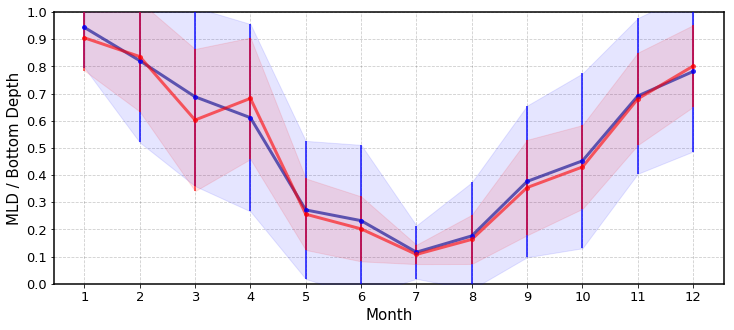

In [61]:
plt.figure(figsize=(12,5))

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylim(0,1.0)
plt.plot(month, t_full_ratio_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_ratio_mean, t_full_ratio_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_ratio_mean) - np.asarray(t_full_ratio_std), np.asarray(t_full_ratio_mean) + np.asarray(t_full_ratio_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_ratio_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_ratio_mean, t_interann_ratio_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_ratio_mean) - np.asarray(t_interann_ratio_std), np.asarray(t_interann_ratio_mean) + np.asarray(t_interann_ratio_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], fontsize = 13) 
plt.ylabel('MLD / Bottom Depth', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.savefig('Additional Figure 1')
plt.show()

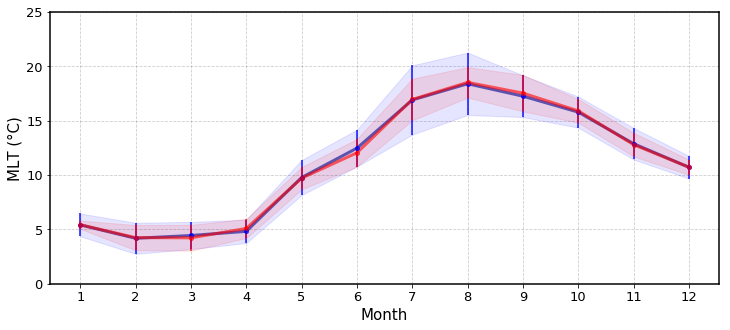

In [63]:
plt.figure(figsize=(12,5))

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylim(0,25)
plt.plot(month, t_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_mlt_mean, t_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_mlt_mean) - np.asarray(t_full_mlt_std), np.asarray(t_full_mlt_mean) + np.asarray(t_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_mlt_mean, t_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_mlt_mean) - np.asarray(t_interann_mlt_std), np.asarray(t_interann_mlt_mean) + np.asarray(t_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('MLT (°C)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
plt.xlabel('Month', fontsize = 15)
plt.savefig('Additional Figure 2')
plt.show()

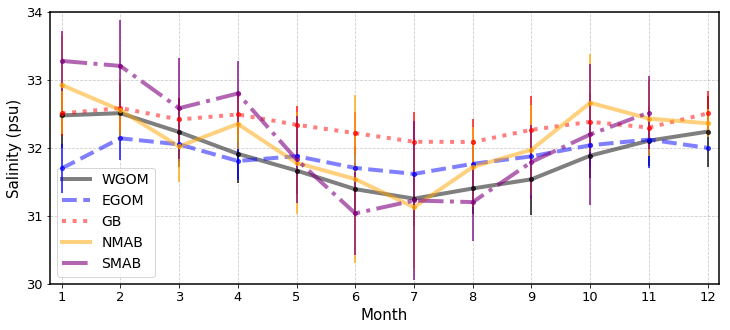

In [1170]:
plt.figure(figsize=(12,5))

plt.plot(month, t_interann_mlt_mean, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.errorbar(month,t_interann_mlt_mean, t_interann_mlt_std,linestyle='None', marker='o',color='k',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
# plt.fill_between(month, np.asarray(t_interann_mlt_mean) - np.asarray(t_interann_mlt_std), np.asarray(t_interann_mlt_mean) + np.asarray(t_interann_mlt_std),color = 'k', alpha = 0.1)


plt.plot(month, y_interann_mlt_mean, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.errorbar(month,y_interann_mlt_mean, y_interann_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
# plt.fill_between(month, np.asarray(y_interann_mlt_mean) - np.asarray(y_interann_mlt_std), np.asarray(y_interann_mlt_mean) + np.asarray(y_interann_mlt_std),color = 'blue', alpha = 0.1)

plt.plot(month, w_interann_mlt_mean, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.errorbar(month,w_interann_mlt_mean, w_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
# plt.fill_between(month, np.asarray(w_interann_mlt_mean) - np.asarray(w_interann_mlt_std), np.asarray(w_interann_mlt_mean) + np.asarray(w_interann_mlt_std),color = 'red', alpha = 0.1)

plt.plot(month, x_interann_mlt_mean, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.errorbar(month,x_interann_mlt_mean, x_interann_mlt_std,linestyle='None', marker='o',color='orange',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
# plt.fill_between(month, np.asarray(x_interann_mlt_mean) - np.asarray(x_interann_mlt_std), np.asarray(x_interann_mlt_mean) + np.asarray(x_interann_mlt_std),color = 'orange', alpha = 0.1)


plt.plot(month, v_interann_mlt_mean, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.errorbar(month,v_interann_mlt_mean, v_interann_mlt_std,linestyle='None', marker='o',color='purple',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
# plt.fill_between(month, np.asarray(v_interann_mlt_mean) - np.asarray(v_interann_mlt_std), np.asarray(v_interann_mlt_mean) + np.asarray(v_interann_mlt_std),color = 'purple', alpha = 0.1)


plt.xlim(0.8,12.2)
# plt.ylim(0,25)
plt.ylim(30,33.5)


plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('Salinity (psu)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([30,31,32,33,34], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.legend(fontsize=14,loc='lower left')
plt.savefig('Only error bars')

In [777]:
# month = [1,2,3,4,5,6,7,8,9,10,11,12]
# # print(v_interann_mlt_mean)
# print(np.nanmin(y_interann_mean))
# print(np.nanmin(t_interann_mean))
# print(np.nanmin(w_interann_mean))

# print(np.nanmin(x_interann_mean))
# print(np.nanmin(v_interann_mean))

# print(t_interann_mean)
# print(t_interann_std)


# print('')
print(np.nanmax(y_interann_ratio_mean)-np.nanmin(y_interann_ratio_mean))

print(np.nanmax(t_interann_ratio_mean)-np.nanmin(t_interann_ratio_mean))


print(np.nanmax(w_interann_ratio_mean)-np.nanmin(w_interann_ratio_mean))
print(np.nanmax(x_interann_ratio_mean)-np.nanmin(x_interann_ratio_mean))
print(np.nanmax(v_interann_ratio_mean)-np.nanmin(v_interann_ratio_mean))


# print(v_interann_std)
# print(t_interann_mlt_mean[7])
# print(np.nanmax(y_interann_ratio_mean))
# print(y_interann_mlt_mean)
# print(t_interann_mlt_std)



# print('')
# print(t_interann_mlt_std[7])
# print(v_interann_mlt_std[7])
# print(v_interann_mean)
# print(np.nanmax(w_interann_mean)-np.nanmin(w_interann_mean))
# print(np.nanmax(x_interann_mean)-np.nanmin(x_interann_mean))
# print(np.nanmax(v_interann_mean)-np.nanmin(v_interann_mean))
# # # print(t_interann_mean)
# # print(w_interann_mean)
# # print(x_interann_mean)
# # print(v_interann_mean)
# print(x_interann_mean)
# print(x_interann_std)

0.27690435087939946
0.5086585319961959
0.5819768865723299
0.6069289223378583
0.49552222271859264


In [430]:
32.51137591015972 - 31.253190020377517
0.37502228349242284 + 0.4039854946837216

0.013291480869052874

0.7790077781761444

## MLD SEASONAL CYCLE

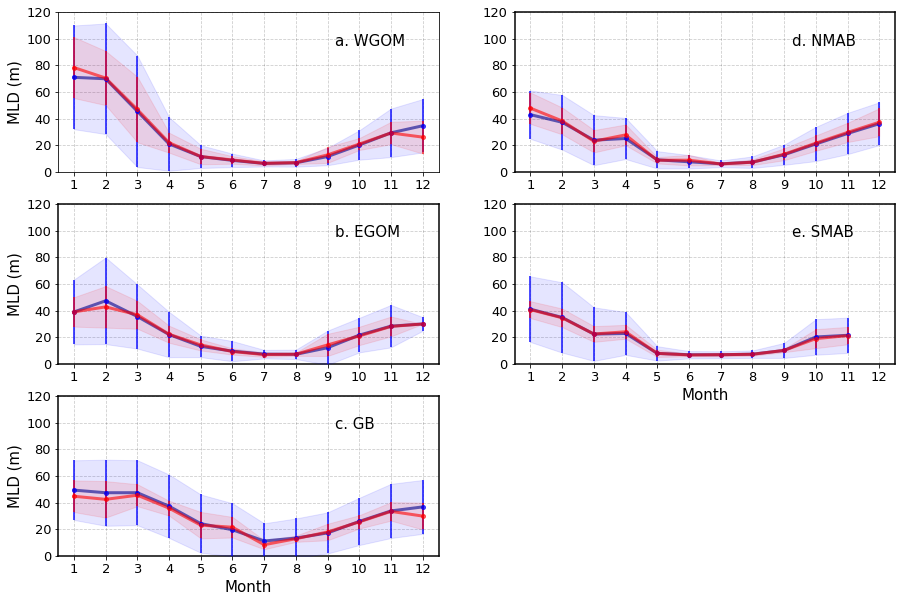

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(321) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)

plt.plot(month, t_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_mean, t_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_mean) - np.asarray(t_full_std), np.asarray(t_full_mean) + np.asarray(t_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_mean, t_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_mean) - np.asarray(t_interann_std), np.asarray(t_interann_mean) + np.asarray(t_interann_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'a. WGOM', dict(size=15))
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(322) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'd. NMAB', dict(size=15))

plt.plot(month, x_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_full_mean, x_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(x_full_mean) - np.asarray(x_full_std), np.asarray(x_full_mean) + np.asarray(x_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_interann_mean, x_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(x_interann_mean) - np.asarray(x_interann_std), np.asarray(x_interann_mean) + np.asarray(x_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(323) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'b. EGOM', dict(size=15))
plt.ylabel('MLD (m)', fontsize = 15)

plt.plot(month, y_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_full_mean, y_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(y_full_mean) - np.asarray(y_full_std), np.asarray(y_full_mean) + np.asarray(y_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, y_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_interann_mean, y_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(y_interann_mean) - np.asarray(y_interann_std), np.asarray(y_interann_mean) + np.asarray(y_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(324) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'e. SMAB', dict(size=15))
plt.xlabel('Month', fontsize = 15)

plt.plot(month, v_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_full_mean, v_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(v_full_mean) - np.asarray(v_full_std), np.asarray(v_full_mean) + np.asarray(v_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, v_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_interann_mean, v_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(v_interann_mean) - np.asarray(v_interann_std), np.asarray(v_interann_mean) + np.asarray(v_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(325) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'c. GB', dict(size=15))
plt.ylabel('MLD (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)

plt.plot(month, w_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_full_mean, w_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(w_full_mean) - np.asarray(w_full_std), np.asarray(w_full_mean) + np.asarray(w_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, w_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_interann_mean, w_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(w_interann_mean) - np.asarray(w_interann_std), np.asarray(w_interann_mean) + np.asarray(w_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

# plt.savefig('replacedw5')
plt.show()

## MLT SEASONAL CYCLE

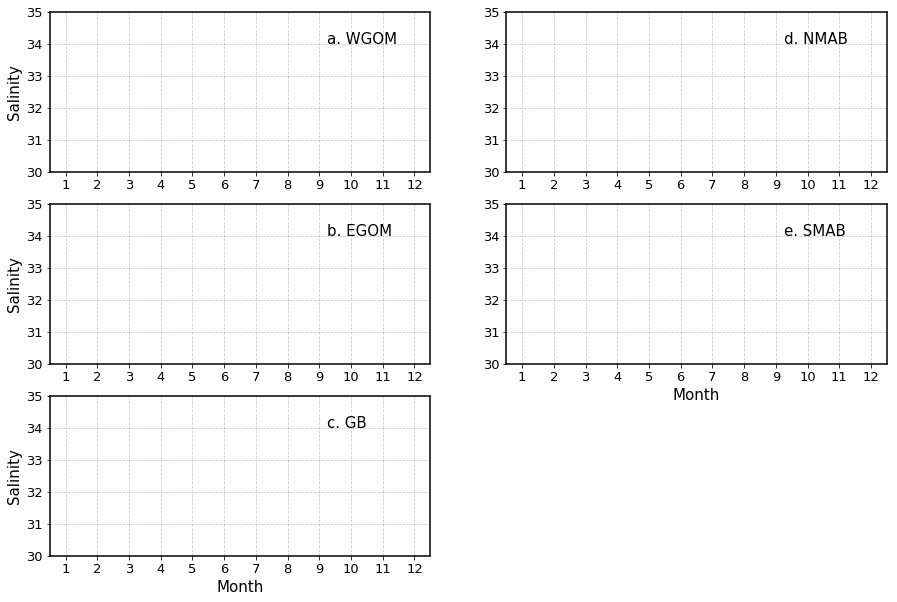

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(321) #------------------------
plt.ylim(30,35)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)

plt.plot(month, t_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_mlt_mean, t_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_mlt_mean) - np.asarray(t_full_mlt_std), np.asarray(t_full_mlt_mean) + np.asarray(t_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_mlt_mean, t_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_mlt_mean) - np.asarray(t_interann_mlt_std), np.asarray(t_interann_mlt_mean) + np.asarray(t_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('Salinity', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([30,31,32,33,34,35], fontsize = 13) 
plt.text(9.25, 34, 'a. WGOM', dict(size=15))
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(322) #------------------------
plt.ylim(30,35)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([30,31,32,33,34,35], fontsize = 13) 
plt.text(9.25, 34, 'd. NMAB', dict(size=15))

plt.plot(month, x_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_full_mlt_mean, x_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(x_full_mlt_mean) - np.asarray(x_full_mlt_std), np.asarray(x_full_mlt_mean) + np.asarray(x_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_interann_mlt_mean, x_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(x_interann_mlt_mean) - np.asarray(x_interann_mlt_std), np.asarray(x_interann_mlt_mean) + np.asarray(x_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(323) #------------------------
plt.ylim(30,35)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([30,31,32,33,34,35], fontsize = 13) 
plt.text(9.25, 34, 'b. EGOM', dict(size=15))
plt.ylabel('Salinity', fontsize = 15)

plt.plot(month, y_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_full_mlt_mean, y_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(y_full_mlt_mean) - np.asarray(y_full_mlt_std), np.asarray(y_full_mlt_mean) + np.asarray(y_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, y_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_interann_mlt_mean, y_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(y_interann_mlt_mean) - np.asarray(y_interann_mlt_std), np.asarray(y_interann_mlt_mean) + np.asarray(y_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(324) #------------------------
plt.ylim(30,35)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([30,31,32,33,34,35], fontsize = 13) 
plt.text(9.25, 34, 'e. SMAB', dict(size=15))
plt.xlabel('Month', fontsize = 15)

plt.plot(month, v_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_full_mlt_mean, v_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(v_full_mlt_mean) - np.asarray(v_full_mlt_std), np.asarray(v_full_mlt_mean) + np.asarray(v_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, v_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_interann_mlt_mean, v_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(v_interann_mlt_mean) - np.asarray(v_interann_mlt_std), np.asarray(v_interann_mlt_mean) + np.asarray(v_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(325) #------------------------
plt.ylim(30,35)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([30,31,32,33,34,35], fontsize = 13) 
plt.text(9.25, 34, 'c. GB', dict(size=15))
plt.ylabel('Salinity', fontsize = 15)
plt.xlabel('Month', fontsize = 15)

plt.plot(month, w_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_full_mlt_mean, w_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(w_full_mlt_mean) - np.asarray(w_full_mlt_std), np.asarray(w_full_mlt_mean) + np.asarray(w_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, w_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_interann_mlt_mean, w_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(w_interann_mlt_mean) - np.asarray(w_interann_mlt_std), np.asarray(w_interann_mlt_mean) + np.asarray(w_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

# plt.savefig('salinity_seasonal_cycle')
plt.show()

In [149]:
print(winter_list_reindex)

      index  Unnamed: 0    obs_lat    obs_lon  glorys_lat  glorys_lon  \
0         0           0  40.900000  70.683300   40.916668  -70.666664   
1         1           1  41.035000  70.366700   41.000000  -70.333336   
2         2           2  41.065000  70.030000   41.083332  -70.000000   
3         3           3  40.931700  70.133300   40.916668  -70.166664   
4         4           4  40.930000  69.985000   40.916668  -70.000000   
...     ...         ...        ...        ...         ...         ...   
4418   3152        3152  42.511667  69.653333   42.500000  -69.666664   
4419   3153        3153  42.505000  69.655000   42.500000  -69.666664   
4420   3154        3154  42.315000  70.278333   42.333332  -70.250000   
4421   3155        3155  42.338333  70.328333   42.333332  -70.333336   
4422   3156        3156  42.356667  70.465000   42.333332  -70.500000   

      glorys_lat_index  glorys_lon_index  bottomdepth  year  date_no  \
0                   71                88           

## SPATIAL PLOTS

In [60]:
season = spring_list_reindex #spring #summer #fall #winter
variable = 'tempatmld'

variablelist_003 = []; yearlist = []; latlist = []; lonlist = []; bottomdepthlist = []; ratiolist = []; mltlist = []
for ii in range(len(season)):
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
        variablelist_003.append(season['003densmld'][ii])
        yearlist.append(season['year'][ii])
        latlist.append(season['obs_lat'][ii])
        lonlist.append(season['obs_lon'][ii])
        bottomdepthlist.append(season['bottomdepth'][ii])
        ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
        mltlist.append(season[variable][ii])
    elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
        variablelist_003.append(season['003densmld'][ii])
        yearlist.append(season['year'][ii])
        latlist.append(season['obs_lat'][ii])
        lonlist.append(season['obs_lon'][ii])
        bottomdepthlist.append(season['bottomdepth'][ii])
        ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
        mltlist.append(season[variable][ii])
    elif polygon_t.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True:
        variablelist_003.append(season['003densmld'][ii])
        yearlist.append(season['year'][ii])
        latlist.append(season['obs_lat'][ii])
        lonlist.append(season['obs_lon'][ii])
        bottomdepthlist.append(season['bottomdepth'][ii])
        ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
        mltlist.append(season[variable][ii])
    else:
        pass
pandas = pd.DataFrame({'year': yearlist, 'mld': variablelist_003, 'lon': lonlist, 'lat': latlist, 'bottomdepth': bottomdepthlist, 'ratio': ratiolist, 'mlt': mltlist})


In [365]:
print(winter_list_reindex_s)

      index  Unnamed: 0    obs_lat    obs_lon  glorys_lat  glorys_lon  \
0         0           0  40.900000  70.683300   40.916668  -70.666664   
1         1           1  41.035000  70.366700   41.000000  -70.333336   
2         2           2  41.065000  70.030000   41.083332  -70.000000   
3         3           3  40.931700  70.133300   40.916668  -70.166664   
4         4           4  40.930000  69.985000   40.916668  -70.000000   
...     ...         ...        ...        ...         ...         ...   
4418   3152        3152  42.511667  69.653333   42.500000  -69.666664   
4419   3153        3153  42.505000  69.655000   42.500000  -69.666664   
4420   3154        3154  42.315000  70.278333   42.333332  -70.250000   
4421   3155        3155  42.338333  70.328333   42.333332  -70.333336   
4422   3156        3156  42.356667  70.465000   42.333332  -70.500000   

      glorys_lat_index  glorys_lon_index  bottomdepth  year  date_no  \
0                   71                88           

In [167]:
season = summer_list_reindex #spring #summer #fall #winter
variable = 'tempatmld'

variablelist_003 = []; yearlist = []; latlist = []; lonlist = []; bottomdepthlist = []; ratiolist = []; mltlist = []
for ii in range(len(season)):
    variablelist_003.append(season['003densmld'][ii])
    yearlist.append(season['year'][ii])
    latlist.append(season['obs_lat'][ii])
    lonlist.append(season['obs_lon'][ii])
    bottomdepthlist.append(season['bottomdepth'][ii])
    ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
    mltlist.append(season[variable][ii])

pandas = pd.DataFrame({'year': yearlist, 'mld': variablelist_003, 'lon': lonlist, 'lat': latlist, 'bottomdepth': bottomdepthlist, 'ratio': ratiolist, 'mlt': mltlist})

print(len(pandas))

8739


29.0
4.0
16.040118524598828


(array([  54.,  404., 1408., 1024., 2020., 1085., 1125.,  897.,  711.,
          11.]),
 array([ 4. ,  6.5,  9. , 11.5, 14. , 16.5, 19. , 21.5, 24. , 26.5, 29. ]),
 <a list of 10 Patch objects>)

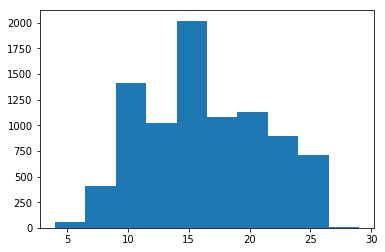

In [168]:
print(np.nanmax(pandas['mlt']))
print(np.nanmin(pandas['mlt']))
print(np.nanmean(pandas['mlt']))
plt.hist(pandas['mlt'])

In [169]:
import matplotlib as mpl
from matplotlib import cm, colors
f_corr = pandas['mlt']
cmin = 0 #30.0
cmax = 26 #36.5
clev = 26 #13.
dc = (cmax - cmin)/clev ; vcs = np.arange(cmin,cmax+dc,dc)
pal_norms = colors.BoundaryNorm(vcs,ncolors=256, clip = False)
# cc = ax.pcolor(f_corr,norm = pal_norms,cmap=cm.hot_r)
lonarray = np.asarray(lonlist)
latarray = np.asarray(latlist)
# plt.scatter(lonarray*-1,latarray,c=pandas['mlt'],alpha=0.8,s = 2, cmap = cm.gist_rainbow, norm = pal_norms)
# plt.contourf(lonarray*-1,latarray,pandas['mlt'],alpha=0.8,cmap = cm.gist_rainbow, norm = pal_norms)
# plt.colorbar()
# plt.show()
# print(np.max(pandas['mlt']))
# print(np.min(pandas['mlt']))

In [170]:
print(lonarray.shape)
print(latarray.shape)

(8739,)
(8739,)


In [171]:
np.nanmean(spring_list_reindex_s[variable])

6.60295665659932

In [172]:
print(np.nanmin(mltlist))

4.0


In [173]:
print(len(pandas))

8739


In [174]:
print(len(season))

8739


In [175]:
df = pandas
print(len(df))

8739


In [176]:
print(np.nanmin(df['mld']))

5.0


In [177]:
from scipy.interpolate import griddata

In [178]:
file_in ='Ecoboundaries3.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

In [179]:
import numpy as np
from matplotlib.path import Path

nx = np.arange(-76,-65,0.05)
ny = np.arange(35,46,0.05)
# df_w_plottable = pd.DataFrame({'lon': NC['bnd'][0][1]-360, 'lat': latlist_w,}) 

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]

# newlon = NC['bnd_shelf_total5'][1]-360
# newlat = NC['bnd_shelf_total5'][0]

newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

grid = path_new.contains_points(points) 
grid = grid.reshape((220,220))

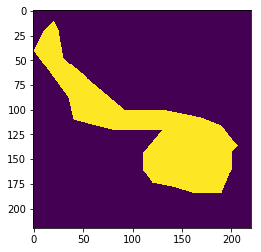

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid)

In [181]:
yearlist = list(df.year.unique())
yearlistint = [int(i) for i in yearlist]
print(yearlistint)

[1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2003, 2014]


In [182]:
full_of_zi = []
for i in range(len(yearlistint)):
    df_new = df[df.year == yearlistint[i]]
    x = df_new['lon']*-1
    y = df_new['lat']
    z = df_new['mlt'] #mlt #mld 
    
    xi = np.arange(-76,-65,0.05)
    yi = np.arange(35,46,0.05)

    xi,yi = np.meshgrid(xi,yi)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    zi = zi.reshape((220,220)) 
    full_of_zi.append(zi)

In [183]:
# np.nanmin(zi)
print(np.nanmean(zi))
print(np.nanmin(zi))
print(np.nanmax(zi))

17.41669684335253
11.166473086377556
23.000000000000004


In [184]:
print(np.asarray(full_of_zi).shape)

(26, 220, 220)


In [185]:
meangrid = np.nanmean(full_of_zi,axis = 0)
meangrid_1 = np.where(grid == True, meangrid, grid)
meangrid_2 = np.where(np.isnan(meangrid_1), np.nan, meangrid_1) # fill this with NaN instead of 0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [186]:
meangrid_nangrid = np.where(grid == False, np.nan, grid)
# meangrid_2 = np.where(np.isnan(meangrid_1), np.nan, meangrid_1) # fill this with NaN instead of 0

In [187]:
try_meangrid = np.where(meangrid_nangrid == 1., meangrid, meangrid_nangrid)



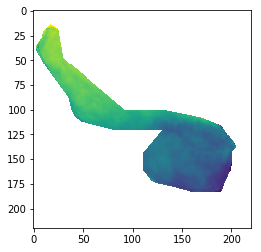

In [188]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(try_meangrid)
# print(meangrid_1)
# print(try_meangrid)

In [189]:
print(np.nanmean(try_meangrid))
print(np.nanmin(try_meangrid))
print(np.nanmax(try_meangrid))

16.491142819161215
6.539613875069367
26.95122039082901


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


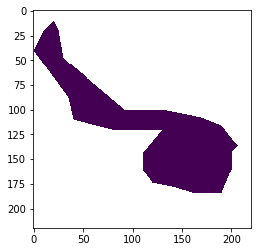

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(meangrid_nangrid)
print(meangrid_nangrid)

In [191]:
print(np.nanmax(try_meangrid))
print(np.nanmin(try_meangrid))
print(np.nanmean(try_meangrid))

26.95122039082901
6.539613875069367
16.491142819161215


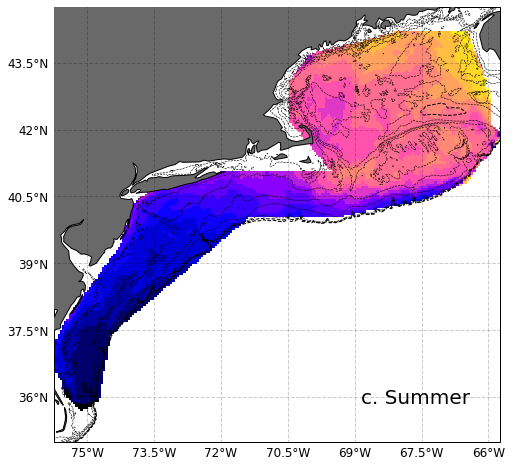

In [192]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature
from matplotlib import cm, colors
import cmocean

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

# --------------
cmin = 6#2#30.0#0#0 #6#0#0 #30.0
cmax = 26#12#35.0#100#1 #26#12#24.5 #34.5
clev = 20# 20#20.#30#25 #40#24 #49 #45.
dc = (cmax - cmin)/clev ; vcs = np.arange(cmin,cmax+dc,dc)
pal_norms = colors.BoundaryNorm(vcs,ncolors=256, clip = False)
# --------------
plt.text(-68.85, 35.85, 'c. Summer', dict(size=20))
# cmap=plt.cm.get_cmap('Blues', 150)
# cf = plt.contourf(xi,yi,meangrid_2, np.arange(0, 35,0.01), cmap = 'ocean_r')
##### cf = plt.contourf(xi,yi,meangrid_2, np.arange(30, 35,0.01), cmap = 'ocean_r',zorder =2)
# cf = plt.contourf(xi,yi,try_meangrid, cmap = cm.gist_rainbow, norm = pal_norms,zorder =2)
cf = plt.pcolor(xi,yi,try_meangrid, cmap = 'gnuplot2_r', norm = pal_norms,zorder =2)
# cmocean.cm.dense
# cm.gist_rainbow
#cf = plt.contourf(xi,yi,meangrid_2, np.arange(0, 1.02,0.01), cmap = 'ocean_r')
#cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,30.25,0.01), cmap = 'ocean_r')
#cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,92,0.01), cmap = 'ocean_r')

ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
# cbar = plt.colorbar(cf, ticks=[30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35], orientation='vertical')
# cbar.ax.set_xticklabels([30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35])
###cbar = plt.colorbar(cf, ticks=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34], orientation='vertical')
###cbar.ax.set_xticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34])
###cbar.ax.tick_params(labelsize=12) 
# cbar = plt.colorbar(cf, ticks=np.arange(6.,28,2))
########## cbar = plt.colorbar(cf, ticks=np.arange(6.,27,2.))
#### cbar = plt.colorbar(cf, ticks=np.arange(30.,35.,0.5), orientation='vertical')
# cbar.ax.set_xticklabels([0,20,40,60,80,100])
# cbar = plt.colorbar(cf, ax=ax)
########## cbar.ax.get_yaxis().labelpad = 20

########## cbar.ax.set_ylabel('Mixed Layer Temperature (°C)', rotation=270, fontsize = 15)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100])
########## cbar.ax.tick_params(labelsize=12)

# plt.savefig('Salinity_Spring_b')
plt.savefig('Summer_MLT_SP',dpi=400)

plt.show()

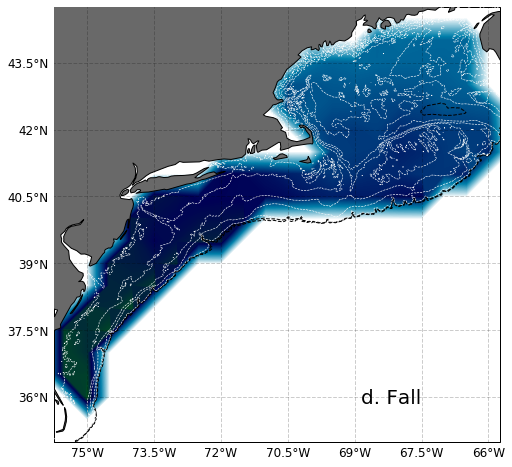

In [237]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'd. Fall', dict(size=20))
# cmap=plt.cm.get_cmap('Blues', 150)
# cf = plt.contourf(xi,yi,d, np.arange(0, 1.02,0.01), cmap = cmap)
# cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,30.25,0.01), cmap = 'ocean_r')
cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,26.5,0.01), cmap = 'ocean_r')
ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='white', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='white',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
### cbar = plt.colorbar(cf, ticks=[0,2,4,6,8,10,12,14,16,18,20,22,24,26], orientation='vertical')
### cbar.ax.set_xticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26])
### cbar.ax.tick_params(labelsize=15) 

# cbar = plt.colorbar(cf, ticks=[-80,-60,-40,-20,0,20,40,60,80], orientation='vertical')
# cbar.ax.set_xticklabels([0,20,40,60,80,100])
# # # cbar = plt.colorbar(cf, ax=ax)
### cbar.ax.get_yaxis().labelpad = 20

### cbar.ax.set_ylabel('MLT (° C)', rotation=270, fontsize = 18)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100])
# cbar.ax.tick_params(labelsize=12)

plt.savefig('Fall_temp_new_color_gradient')
plt.show()

# Comparison of observed dens. MLDs and observed temp. MLDs

In [778]:
# WINTER
merged_winter = pd.merge(winter_list_reindex, winter_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_winter = merged_winter.drop_duplicates(subset=['location'])
# SPRING
merged_spring = pd.merge(spring_list_reindex, spring_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_spring = merged_spring.drop_duplicates(subset=['location'])
# SUMMER
merged_summer = pd.merge(summer_list_reindex, summer_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_summer = merged_summer.drop_duplicates(subset=['location'])
# FALL
merged_fall = pd.merge(fall_list_reindex, fall_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_fall = merged_fall.drop_duplicates(subset=['location'])

In [796]:
merged_winter['difftempdens'] = merged_winter['02tempmld'] - merged_winter['003densmld']
print(np.nanmean(merged_winter['difftempdens']))
print(np.nanstd(merged_winter['difftempdens']))
print('')
merged_spring['difftempdens'] = merged_spring['02tempmld'] - merged_spring['003densmld']
print(np.nanmean(merged_spring['difftempdens']))
print(np.nanstd(merged_spring['difftempdens']))
print('')
merged_summer['difftempdens'] = merged_summer['02tempmld'] - merged_summer['003densmld']
print(np.nanmean(merged_summer['difftempdens']))
print(np.nanstd(merged_summer['difftempdens']))
print('')
merged_fall['difftempdens'] = merged_fall['02tempmld'] - merged_fall['003densmld']
print(np.nanmean(merged_fall['difftempdens']))
print(np.nanstd(merged_fall['difftempdens']))

print(merged_fall[(merged_fall['difftempdens'] == 0)].count())
print(len(merged_fall))
# 1888

4.690103329506315
18.413567250458062

7.722044398554465
23.404256482440918

1.7613741875580315
9.96698056785143

5.91977731130784
12.523397775968316
index_x               2782
Unnamed: 0_x          2782
obs_lat_x             2782
obs_lon_x             2782
glorys_lat_x          2782
glorys_lon_x          2782
glorys_lat_index_x    2782
glorys_lon_index_x    2782
bottomdepth_x         2782
year_x                2782
date_no_x             2782
003densmld            2782
glorys_mld_x          2775
tempatmld             2782
location              2782
index_y               2782
Unnamed: 0_y          2782
obs_lat_y             2782
obs_lon_y             2782
glorys_lat_y          2782
glorys_lon_y          2782
glorys_lat_index_y    2782
glorys_lon_index_y    2782
bottomdepth_y         2782
year_y                2782
date_no_y             2782
02tempmld             2782
glorys_mld_y          2775
densatmld             2782
difftempdens          2782
dtype: int64
11092


In [797]:
2782 / 11092

0.25081139560043275

In [1487]:
# counts
season = merged_fall

season_remnandens = season.dropna(subset=['003densmld'])
season_remnantemp = season_remnandens.dropna(subset=['02tempmld'])
print(len(season))
print(len(season_remnandens))
print(len(season_remnantemp))

11092
11033
10957


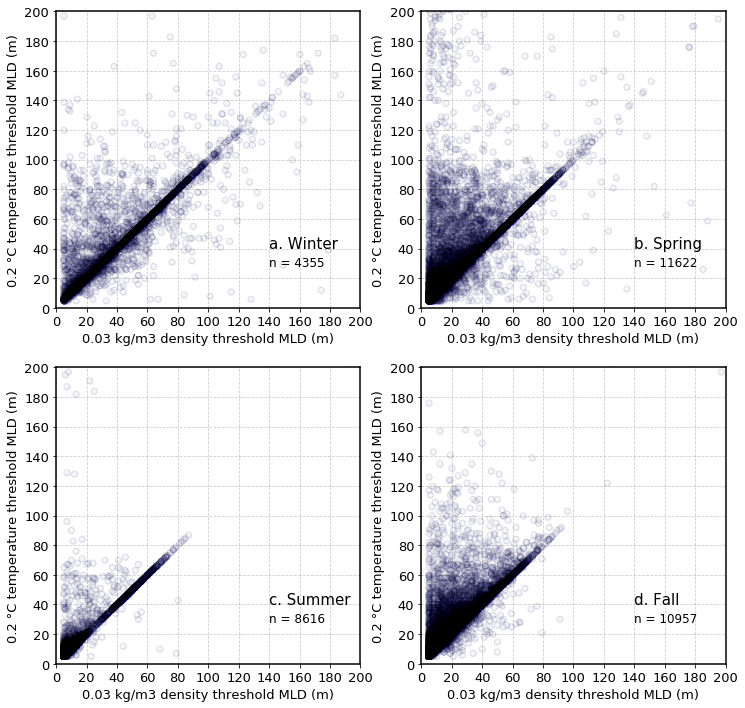

In [1493]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_winter['003densmld'],merged_winter['02tempmld'],c='darkblue',edgecolors='b',alpha=0.04)
plt.scatter(merged_winter['003densmld'],merged_winter['02tempmld'],c="None",edgecolors='k',alpha=0.1)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'a. Winter', dict(size=15))
plt.text(140, 28, 'n = 4355', dict(size=12))

plt.subplot(222)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_spring['003densmld'],merged_spring['02tempmld'],c='darkblue',edgecolors='b',alpha=0.04)
plt.scatter(merged_spring['003densmld'],merged_spring['02tempmld'],c="None",edgecolors='k',alpha=0.1)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'b. Spring', dict(size=15))
plt.text(140, 28, 'n = 11622', dict(size=12))

plt.subplot(223)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_summer['003densmld'],merged_summer['02tempmld'],c='darkblue',edgecolors='b',alpha=0.04)
plt.scatter(merged_summer['003densmld'],merged_summer['02tempmld'],c="None",edgecolors='k',alpha=0.1)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'c. Summer', dict(size=15))
plt.text(140, 28, 'n = 8616', dict(size=12))

plt.subplot(224)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_fall['003densmld'],merged_fall['02tempmld'],c='darkblue',edgecolors='b',alpha=0.04)
plt.scatter(merged_fall['003densmld'],merged_fall['02tempmld'],c="None",edgecolors='k',alpha=0.1)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13)
plt.text(140, 40, 'd. Fall', dict(size=15))
plt.text(140, 28, 'n = 10957', dict(size=12))

mpl.rcParams['axes.linewidth'] = 1.5
plt.savefig('Remake Figure 9 Updated')

In [808]:
# JAN
merged_jan = pd.merge(jan, jan_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_jan = merged_jan.drop_duplicates(subset=['location'])
# FEB
merged_feb = pd.merge(feb, feb_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_feb = merged_feb.drop_duplicates(subset=['location'])
# MARCH
merged_march = pd.merge(march, march_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_march = merged_march.drop_duplicates(subset=['location'])
# APRIL
merged_april = pd.merge(april, april_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_april = merged_april.drop_duplicates(subset=['location'])
# MAY
merged_may = pd.merge(may, may_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_may = merged_may.drop_duplicates(subset=['location'])
# JUNE
merged_june = pd.merge(june, june_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_june = merged_june.drop_duplicates(subset=['location'])
# JULY
merged_july = pd.merge(july, july_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_july = merged_july.drop_duplicates(subset=['location'])
# AUGUST
merged_aug = pd.merge(aug, aug_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_aug = merged_aug.drop_duplicates(subset=['location'])
# SEPTEMBER
merged_sept = pd.merge(sept, sept_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_sept = merged_sept.drop_duplicates(subset=['location'])
# OCTOBER
merged_octob = pd.merge(octob, octob_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_octob = merged_octob.drop_duplicates(subset=['location'])
# NOVEMBER
merged_nov = pd.merge(nov, nov_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_nov = merged_nov.drop_duplicates(subset=['location'])
# DECEMBER
merged_dec = pd.merge(dec, dec_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_dec = merged_dec.drop_duplicates(subset=['location'])

In [809]:
# plt.scatter(merged_dec['003densmld'],merged_dec['02tempmld'],c='darkblue',alpha=1)
# merged_dec
merged_dec_grouped = merged_dec.groupby(['year_y']).mean()
print(np.nanmean(merged_dec_grouped['02tempmld']))
print(np.nanmean(merged_dec_grouped['003densmld']))
print(len(merged_dec))

52.28494983277592
30.262047640614217
247


In [810]:
merged_winter = [merged_dec, merged_jan, merged_feb]; merged_winter_list = pd.concat(merged_winter); merged_winter_list_reindex = merged_winter_list.reset_index()
merged_spring = [merged_march, merged_april, merged_may]; merged_spring_list = pd.concat(merged_spring); merged_spring_list_reindex = merged_spring_list.reset_index()
merged_summer = [merged_june, merged_july, merged_aug]; merged_summer_list = pd.concat(merged_summer); merged_summer_list_reindex = merged_summer_list.reset_index()
merged_fall = [merged_sept, merged_octob, merged_nov]; merged_fall_list = pd.concat(merged_fall); merged_fall_list_reindex = merged_fall_list.reset_index()

In [811]:
merged_full = [merged_jan.reset_index(), merged_feb.reset_index(), merged_march.reset_index(), merged_april.reset_index(), 
        merged_may.reset_index(), merged_june.reset_index(), merged_july.reset_index(), merged_aug.reset_index(), 
        merged_sept.reset_index(), merged_octob.reset_index(), merged_nov.reset_index(), merged_dec.reset_index()]

In [812]:
t_interann_mean_densmld = []; t_interann_mean_tempmld = []; t_mean_densmld = []; t_mean_tempmld = []
y_interann_mean_densmld = []; y_interann_mean_tempmld = []; y_mean_densmld = []; y_mean_tempmld = []
w_interann_mean_densmld = []; w_interann_mean_tempmld = []; w_mean_densmld = []; w_mean_tempmld = []
x_interann_mean_densmld = []; x_interann_mean_tempmld = []; x_mean_densmld = []; x_mean_tempmld = []
v_interann_mean_densmld = []; v_interann_mean_tempmld = []; v_mean_densmld = []; v_mean_tempmld = []

for i in range(len(merged_full)): #full
    season = merged_full[i] #full
    
    variablelist_003_t = []; yearlist_t = []; temp_mld_t = []
    variablelist_003_y = []; yearlist_y = []; temp_mld_y = []
    variablelist_003_x = []; yearlist_x = []; temp_mld_x = []
    variablelist_003_v = []; yearlist_v = []; temp_mld_v = []
    variablelist_003_w = []; yearlist_w = []; temp_mld_w = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon_x']),'lat': list(season['obs_lat_x'])})
 
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            variablelist_003_t.append(season['003densmld'][ii])
            yearlist_t.append(season['year_x'][ii])
            temp_mld_t.append(season['02tempmld'][ii])
        elif polygon_y.contains(point) == True:
            variablelist_003_y.append(season['003densmld'][ii])
            yearlist_y.append(season['year_x'][ii])
            temp_mld_y.append(season['02tempmld'][ii])
        elif polygon_w.contains(point) == True:
            variablelist_003_w.append(season['003densmld'][ii])
            yearlist_w.append(season['year_x'][ii])
            temp_mld_w.append(season['02tempmld'][ii])
        elif polygon_v.contains(point) == True and (season['bottomdepth_x'][ii]<=200):
            variablelist_003_v.append(season['003densmld'][ii])
            yearlist_v.append(season['year_x'][ii])
            temp_mld_v.append(season['02tempmld'][ii])
        elif polygon_x.contains(point) == True and (season['bottomdepth_x'][ii]<=200):
            variablelist_003_x.append(season['003densmld'][ii])
            yearlist_x.append(season['year_x'][ii])
            temp_mld_x.append(season['02tempmld'][ii])
        else:
            pass
    
    pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': variablelist_003_t, '02tempmld': temp_mld_t})
    use = pandas_t    
    interannual_grouped_003_t = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_t

    t_interann_mean_densmld.append(np.mean(use_inter['variable']))
    t_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    t_mean_densmld.append(np.nanmean(use['variable']))
    t_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_y= pd.DataFrame({'year': yearlist_y, 'variable': variablelist_003_y, '02tempmld': temp_mld_y})
    use = pandas_y
    interannual_grouped_003_y = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_y
    
    y_interann_mean_densmld.append(np.mean(use_inter['variable']))
    y_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    y_mean_densmld.append(np.nanmean(use['variable']))
    y_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_w= pd.DataFrame({'year': yearlist_w, 'variable': variablelist_003_w, '02tempmld': temp_mld_w})
    use = pandas_w    
    interannual_grouped_003_w = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_w

    w_interann_mean_densmld.append(np.mean(use_inter['variable']))
    w_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    w_mean_densmld.append(np.nanmean(use['variable']))
    w_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_x= pd.DataFrame({'year': yearlist_x, 'variable': variablelist_003_x, '02tempmld': temp_mld_x})
    use = pandas_x
    interannual_grouped_003_x = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_x
    
    x_interann_mean_densmld.append(np.mean(use_inter['variable']))
    x_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    x_mean_densmld.append(np.nanmean(use['variable']))
    x_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_v= pd.DataFrame({'year': yearlist_v, 'variable': variablelist_003_v, '02tempmld': temp_mld_v})
    use = pandas_v
    interannual_grouped_003_v = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_v
    
    v_interann_mean_densmld.append(np.mean(use_inter['variable']))
    v_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    v_mean_densmld.append(np.nanmean(use['variable']))
    v_mean_tempmld.append(np.nanmean(use['02tempmld']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: Mean of empty slice


In [813]:
print(len(merged_jan))

1022


In [814]:
yearlist_un = list(merged_nov.year_x.unique())
print(yearlist_un)

[1993.0, 1994.0, 1996.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, nan]


In [815]:
pandas_t_grouped = pandas_t.groupby(['year']).mean()
print(pandas_t_grouped)
print(np.mean(pandas_t_grouped['02tempmld']))
print(np.mean(pandas_t_grouped['variable']))

print(np.nanmean(pandas_t['02tempmld']))
print(np.nanmean(pandas_t['variable']))

         variable  02tempmld
year                        
1993.0  27.437500  34.000000
1994.0  13.000000  86.000000
2010.0  45.757576  68.272727
2011.0  18.785714  47.571429
58.96103896103895
26.245197510822507
55.453125
34.765625


In [816]:
t_diff_interann = [a_i - b_i for a_i, b_i in zip(t_interann_mean_tempmld, t_interann_mean_densmld)]
y_diff_interann = [a_i - b_i for a_i, b_i in zip(y_interann_mean_tempmld, y_interann_mean_densmld)]
w_diff_interann = [a_i - b_i for a_i, b_i in zip(w_interann_mean_tempmld, w_interann_mean_densmld)]
x_diff_interann = [a_i - b_i for a_i, b_i in zip(x_interann_mean_tempmld, x_interann_mean_densmld)]
v_diff_interann = [a_i - b_i for a_i, b_i in zip(v_interann_mean_tempmld, v_interann_mean_densmld)]

In [817]:
print(len(t_diff_interann))

12


In [141]:
t_diff = [a_i - b_i for a_i, b_i in zip(t_mean_tempmld, t_mean_densmld)]
y_diff = [a_i - b_i for a_i, b_i in zip(y_mean_tempmld, y_mean_densmld)]
w_diff = [a_i - b_i for a_i, b_i in zip(w_mean_tempmld, w_mean_densmld)]
x_diff = [a_i - b_i for a_i, b_i in zip(x_mean_tempmld, x_mean_densmld)]
v_diff = [a_i - b_i for a_i, b_i in zip(v_mean_tempmld, v_mean_densmld)]

In [143]:
print(t_diff_interann)

[10.349911277434401, 8.843220243918083, 10.641219261935383, 18.776468396845694, 8.769565405405105, 1.417643211193793, 0.592720313032812, 0.9317249647976249, 1.9479427132768325, 5.81150072655738, 16.138790148963306, 32.715841450216445]


In [142]:
print(t_diff)

[13.241253485683188, 5.062438618393685, 12.3878947368421, 19.00334575376494, 6.860955090371691, 1.4179755671902274, 0.7462686567164178, 0.8134715025906738, 1.5070921985815602, 5.735849392564255, 15.389483112468351, 20.6875]


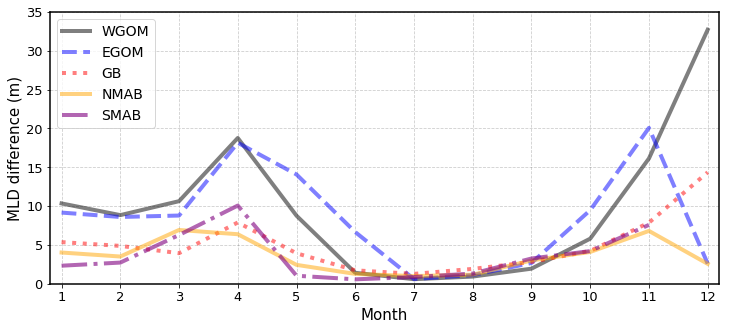

In [147]:
plt.figure(figsize=(12,5))

plt.plot(month, t_diff_interann, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.plot(month, y_diff_interann, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.plot(month, w_diff_interann, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.plot(month, x_diff_interann, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.plot(month, v_diff_interann, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.xlim(0.8,12.2); plt.ylim(0,35)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD difference (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25,30,35], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.legend(fontsize=14)
plt.savefig('Remake Figure 10 Interann')

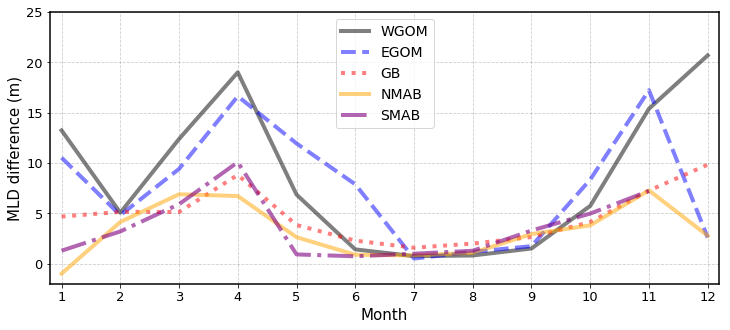

In [161]:
plt.figure(figsize=(12,5))

plt.plot(month, t_diff, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.plot(month, y_diff, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.plot(month, w_diff, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.plot(month, x_diff, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.plot(month, v_diff, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.xlim(0.8,12.2); plt.ylim(-2,25)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD difference (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.legend(fontsize=14,loc='upper center')
plt.savefig('Remake Figure 10 Not Interann')

In [818]:
pandas_winter = pd.DataFrame({'lon':merged_winter_list_reindex['obs_lon_x'], 'lat':merged_winter_list_reindex['obs_lat_x'], 'bottomdepth':merged_winter_list_reindex['bottomdepth_x']
    ,'densmld': merged_winter_list_reindex['003densmld'],'tempmld': merged_winter_list_reindex['02tempmld'], 'diff':merged_winter_list_reindex['02tempmld']-merged_winter_list_reindex['003densmld'] })
pandas_spring = pd.DataFrame({'lon':merged_spring_list_reindex['obs_lon_x'], 'lat':merged_spring_list_reindex['obs_lat_x'], 'bottomdepth':merged_spring_list_reindex['bottomdepth_x']
    ,'densmld': merged_spring_list_reindex['003densmld'],'tempmld': merged_spring_list_reindex['02tempmld'], 'diff':merged_spring_list_reindex['02tempmld']-merged_spring_list_reindex['003densmld']})
pandas_summer = pd.DataFrame({'lon':merged_summer_list_reindex['obs_lon_x'], 'lat':merged_summer_list_reindex['obs_lat_x'], 'bottomdepth':merged_summer_list_reindex['bottomdepth_x']
    ,'densmld': merged_summer_list_reindex['003densmld'],'tempmld': merged_summer_list_reindex['02tempmld'], 'diff':merged_summer_list_reindex['02tempmld']-merged_summer_list_reindex['003densmld']})
pandas_fall = pd.DataFrame({'lon':merged_fall_list_reindex['obs_lon_x'], 'lat':merged_fall_list_reindex['obs_lat_x'], 'bottomdepth':merged_fall_list_reindex['bottomdepth_x']
    ,'densmld': merged_fall_list_reindex['003densmld'],'tempmld': merged_fall_list_reindex['02tempmld'], 'diff':merged_fall_list_reindex['02tempmld']-merged_fall_list_reindex['003densmld']})


In [925]:
# mean and std by region
season = pandas_fall #spring #summer #fall #winter

latlist_t = []; lonlist_t = []; differ_t = []
latlist_y = []; lonlist_y = []; differ_y = []
latlist_x = []; lonlist_x = []; differ_x = []
latlist_v = []; lonlist_v = []; differ_v = []
latlist_w = []; lonlist_w = []; differ_w = []

for ii in range(len(season)):
    newdf = pd.DataFrame({'lon': list(season['lon']),'lat': list(season['lat'])})
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
        differ_v.append(season['diff'][ii])
        latlist_v.append(season['lat'][ii])
        lonlist_v.append(season['lon'][ii])
    elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
        differ_x.append(season['diff'][ii])
        latlist_x.append(season['lat'][ii])
        lonlist_x.append(season['lon'][ii])
    elif polygon_t.contains(point) == True:
        differ_t.append(season['diff'][ii])
        latlist_t.append(season['lat'][ii])
        lonlist_t.append(season['lon'][ii])
    elif polygon_y.contains(point) == True:
        differ_y.append(season['diff'][ii])
        latlist_y.append(season['lat'][ii])
        lonlist_y.append(season['lon'][ii])
    elif polygon_w.contains(point) == True:
        differ_w.append(season['diff'][ii])
        latlist_w.append(season['lat'][ii])
        lonlist_w.append(season['lon'][ii])
    else:
        pass
pandas_v = pd.DataFrame({'diff': differ_v, 'lon': lonlist_v, 'lat': latlist_v})
pandas_x = pd.DataFrame({'diff': differ_x, 'lon': lonlist_x, 'lat': latlist_x})
pandas_t = pd.DataFrame({'diff': differ_t, 'lon': lonlist_t, 'lat': latlist_t})
pandas_y = pd.DataFrame({'diff': differ_y, 'lon': lonlist_y, 'lat': latlist_y})
pandas_w = pd.DataFrame({'diff': differ_w, 'lon': lonlist_w, 'lat': latlist_w})

In [926]:
bigdiff_pos_v = pandas_v[pandas_v['diff'] > (np.nanstd(pandas_v['diff']))]
bigdiff_neg_v = pandas_v[pandas_v['diff'] < -(np.nanstd(pandas_v['diff']))]

bigdiff_pos_x = pandas_x[pandas_x['diff'] > (np.nanstd(pandas_x['diff']))]
bigdiff_neg_x = pandas_x[pandas_x['diff'] < -(np.nanstd(pandas_x['diff']))]

bigdiff_pos_t = pandas_t[pandas_t['diff'] > (np.nanstd(pandas_t['diff']))]
bigdiff_neg_t = pandas_t[pandas_t['diff'] < -(np.nanstd(pandas_t['diff']))]

bigdiff_pos_y = pandas_y[pandas_y['diff'] > (np.nanstd(pandas_y['diff']))]
bigdiff_neg_y = pandas_y[pandas_y['diff'] < -(np.nanstd(pandas_y['diff']))]

bigdiff_pos_w = pandas_w[pandas_w['diff'] > (np.nanstd(pandas_w['diff']))]
bigdiff_neg_w = pandas_w[pandas_w['diff'] < -(np.nanstd(pandas_w['diff']))]

diff_full = [bigdiff_pos_v, bigdiff_neg_v,
              bigdiff_pos_x, bigdiff_neg_x,
              bigdiff_pos_t, bigdiff_neg_t,
              bigdiff_pos_y, bigdiff_neg_y,
              bigdiff_pos_w, bigdiff_neg_w]; diff_list = pd.concat(diff_full)

print(len(diff_list))

diff_full_pos = [bigdiff_pos_v, 
              bigdiff_pos_x, 
              bigdiff_pos_t, 
              bigdiff_pos_y, 
              bigdiff_pos_w]; diff_list_pos = pd.concat(diff_full_pos)
diff_full_neg = [bigdiff_neg_v, 
              bigdiff_neg_x, 
              bigdiff_neg_t, 
              bigdiff_neg_y, 
              bigdiff_neg_w]; diff_list_neg = pd.concat(diff_full_neg)

1708


In [927]:
years = []; latlat = []; lonlon = []; ydyd = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd >=0 and yd <= 31) or (yd > 31 and yd <= 59) or (yd > 334 and yd <= 365):
#         if (yd >59 and yd <= 90) or (yd > 90 and yd <= 120) or (yd > 120 and yd <= 151):
#         if (yd >151 and yd <= 273):
        if (yd >273 and yd <= 334):
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)

        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_t.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
#         elif polygon_EGOM.contains(point) == True or polygon_WGOM.contains(point) == True or polygon_GB.contains(point) == True or polygon_SMAB.contains(point) == True or polygon_NMAB.contains(point) == True:
            latlat.append(month_df['lat'].iloc[ii])
            lonlon.append(month_df['lon'].iloc[ii])
            ydyd.append(month_df['day'].iloc[ii])
            years.append(year)
    print(year)
    print(len(latlat))

1993
231
1994
426
1995
516
1996
715
1997
910
1998
1259
1999
1570
2000
1824
2001
2094
2002
2378
2003
2666
2004
2974
2005
3302
2006
3547
2007
3940
2008
4327
2009
4716
2010
5163
2011
5495
2012
5872
2013
6101
2014
6423
2015
6677
2016
6874
2017
7053
2018
7204


In [928]:
print(np.nanmax(counts))

200.0


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


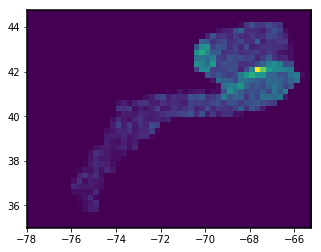

In [934]:
datalatlon = pd.DataFrame({'lon': lonlon,'lat': latlat})

xedges = np.arange(-78,-65,0.25)
yedges = np.arange(35,45,0.25)

nplon = np.asarray(lonlon)
nplat = np.asarray(latlat)

nbins=[xedges,yedges]

hist = plt.hist2d(datalatlon['lon']*-1, datalatlon['lat'], bins = [xedges,yedges])
counts = hist[0]

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(counts.transpose(), extent=extent,  interpolation='none', origin='low')

cmin = 0
cmax = 80#50#100
clev = 20 #20.
dc = (cmax - cmin)/clev ; vcs = np.arange(cmin,cmax+dc,dc)
pal_norms = colors.BoundaryNorm(vcs,ncolors=256, clip = False)

counts[counts == 0] = np.nan
print(counts)

plt.pcolor(counts.T,cmap = cm.gist_rainbow, norm = pal_norms,zorder =2)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(counts.transpose(), extent=extent,  interpolation='none', origin='low')

In [935]:
np.nanmax(counts)
# np.nanmean(counts)

94.0

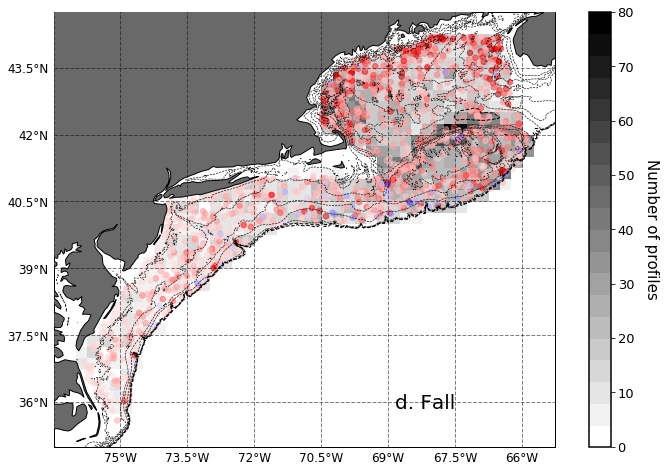

In [943]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-76.5, -65.25, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

# xedges = np.arange(-78,-65,0.25)
# yedges = np.arange(35,45,0.25)

# plt.scatter(diff_list_pos['lon']*-1, diff_list_pos['lat'], c=diff_list_pos['diff'],vmin=-150, vmax=150, s=30, edgecolor = 'red', alpha = 0.5,zorder=3,cmap = 'seismic')
# plt.scatter(diff_list_neg['lon']*-1, diff_list_neg['lat'], c=diff_list_neg['diff'],vmin=-150, vmax=150, s=30, edgecolor = 'blue', alpha = 0.5,zorder=3,cmap = 'seismic')
plt.scatter(diff_list_pos['lon']*-1, diff_list_pos['lat'], c=diff_list_pos['diff'],vmin=-150, vmax=150, s=30, alpha = 0.5,zorder=3,cmap = 'seismic')
plt.scatter(diff_list_neg['lon']*-1, diff_list_neg['lat'], c=diff_list_neg['diff'],vmin=-150, vmax=150, s=30, alpha = 0.5,zorder=3,cmap = 'seismic')


cf = plt.imshow(counts.transpose(), extent=extent,  interpolation='none', origin='low', cmap = cm.gist_gray_r, norm = pal_norms,zorder =2,alpha=1)

# plt.pcolor(counts.T,cmap = cm.gist_rainbow, norm = pal_norms,zorder =2)
# plt.hist2d(datalatlon['lon']*-1, datalatlon['lat'], bins = [xedges,yedges], vmin = 0, vmax = 200, cmap = 'Blues')
# plt.pcolor(datalatlon['lon']*-1, datalatlon['lat'],vmin = 0, vmax = 200, cmap = 'Blues') # make a grid and count number of points inside
# plt.plot(NC['bnd'][0][1]-360, NC['bnd'][0][0],color='black',zorder=500)
# plt.plot(NC['bnd'][1][1]-360, NC['bnd'][1][0], color='black',zorder=50)
# plt.plot(NC['bnd'][2][1]-360, NC['bnd'][2][0], color='black',zorder=50)
# plt.plot(NC['bnd'][3][1]-360, NC['bnd'][3][0], color='black',zorder=50)
# plt.plot(NC['bnd'][4][1]-360, NC['bnd'][4][0], color='black',zorder=50)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
plt.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=3) #alpha = 0.7
plt.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=3) #alpha = 0.7
plt.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=3)

# ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())
cbar = plt.colorbar(cf )
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Number of profiles', rotation=-90, fontsize = 15)
# cbar.set_ticks([0,5,10,15,20,25,30,35,40,45,50]) # Winter
cbar.set_ticks([0,10,20,30,40,50,60,70,80])
cbar.ax.tick_params(labelsize=13)
plt.text(-68.85, 35.85, 'd. Fall', dict(size=20))
plt.savefig('Figure 15 afall',dpi=400)
plt.show()

In [826]:
# # # not by region
# # # WINTER
# # winter_bigdiff_pos = pandas_winter[pandas_winter['diff'] > (np.nanstd(pandas_winter['diff']))]
# # winter_bigdiff_neg = pandas_winter[pandas_winter['diff'] < -(np.nanstd(pandas_winter['diff']))]
# # winter_diff = [winter_bigdiff_pos, winter_bigdiff_neg]; winter_diff_list = pd.concat(winter_diff)

# winter_datalatlon = pd.DataFrame({'lon': merged_winter_list_reindex['obs_lon_x'],'lat': merged_winter_list_reindex['obs_lat_x']})
# # # SPRING
# # spring_bigdiff_pos = pandas_spring[pandas_spring['diff'] > (np.nanstd(pandas_spring['diff']))]
# # spring_bigdiff_neg = pandas_spring[pandas_spring['diff'] < -(np.nanstd(pandas_spring['diff']))]
# # spring_diff = [spring_bigdiff_pos, spring_bigdiff_neg]; spring_diff_list = pd.concat(spring_diff)

# spring_datalatlon = pd.DataFrame({'lon': merged_spring_list_reindex['obs_lon_x'],'lat': merged_spring_list_reindex['obs_lat_x']})
# # # SUMMER
# # summer_bigdiff_pos = pandas_summer[pandas_summer['diff'] > (np.nanstd(pandas_summer['diff']))]
# # summer_bigdiff_neg = pandas_summer[pandas_summer['diff'] < -(np.nanstd(pandas_summer['diff']))]
# # summer_diff = [summer_bigdiff_pos, summer_bigdiff_neg]; summer_diff_list = pd.concat(summer_diff)

# summer_datalatlon = pd.DataFrame({'lon': merged_summer_list_reindex['obs_lon_x'],'lat': merged_summer_list_reindex['obs_lat_x']})
# # # FALL
# # fall_bigdiff_pos = pandas_fall[pandas_fall['diff'] > (np.nanstd(pandas_fall['diff']))]
# # fall_bigdiff_neg = pandas_fall[pandas_fall['diff'] < -(np.nanstd(pandas_fall['diff']))]
# # fall_diff = [fall_bigdiff_pos, fall_bigdiff_neg]; fall_diff_list = pd.concat(fall_diff)

# fall_datalatlon = pd.DataFrame({'lon': merged_fall_list_reindex['obs_lon_x'],'lat': merged_fall_list_reindex['obs_lat_x']})

In [827]:
print(np.nanmax(diff_list))
print(np.nanmin(diff_list))

202.0
-162.0


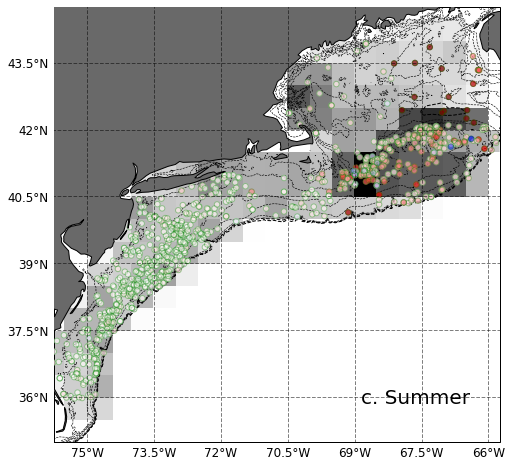

In [1509]:
histuse = fall_datalatlon
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

xedges = [-78,-77.5,-77.0,-76.5,-76,-75.5,-75,-74.4,-74,-73.5,-73,-72.5,-72,-71.5,-71,-70.5,-70,-69.5,-69,-68.5,-68,-67.5,-67,-66.5,-66,-65.5]
yedges = [35,35.5,36.0,36.5,37,37.5,38,38.5,39,39.5,40.0,40.5,41.5,42,42.5,43,43.5,44,44.5,45]
plt.scatter(diff_list['lon']*-1, diff_list['lat'], c=diff_list['diff'],vmin=-150, vmax=150, s=30,alpha = 0.5,zorder=3,cmap = 'seismic')
plt.scatter(diff_list['lon']*-1, diff_list['lat'], c=diff_list['diff'],vmin=-150, vmax=150, s=30,edgecolors='green',alpha = 0.4,zorder=3,cmap = 'seismic')
plt.hist2d(histuse['lon']*-1, histuse['lat'], bins = [xedges,yedges], cmap = 'gray_r',zorder=2)
# plt.scatter(winter_diff_list['lon']*-1, winter_diff_list['lat'], c=winter_diff_list['diff'],vmin=-150, vmax=150, s=40,alpha = 0.4,zorder=50,cmap = 'seismic')
plt.text(-68.85, 35.85, 'c. Summer', dict(size=20))
plt.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=2) #alpha = 0.7
plt.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=2) #alpha = 0.7
plt.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=2)
# plt.hist2d(histuse['lon']*-1, histuse['lat'], bins = [xedges,yedges], cmap = 'gray_r',zorder=2)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 25
# cbar.ax.set_ylabel('Number of profiles', rotation=-90, fontsize = 15)
# cbar.set_ticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325]) # winter
# cbar.set_ticks([0,100,200,300,400,500,600,700,800,900]) # winter
# cbar.set_ticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
# cbar.ax.tick_params(labelsize=13)
# plt.savefig('Fall-Fig11')
plt.show()

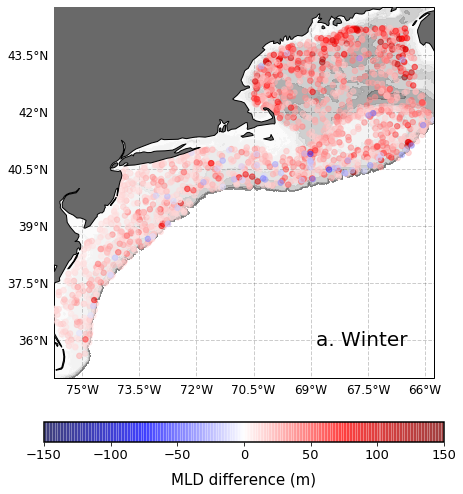

In [331]:
difflist = diff_list

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
cf = plt.contourf(lonNC,latNC,depthNC, [-400,-300,-200,-100,-75,-50,-25,0], cmap = 'gray',alpha=0.5)
# ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=20) #alpha = 0.7
# ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=20) #alpha = 0.7
# ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=20)

plt.scatter(difflist['lon']*-1, difflist['lat'], c=difflist['diff'],vmin=-150, vmax=150, s=30,alpha = 0.5,zorder=50,cmap = 'seismic')

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=200)

plt.text(-68.85, 35.85, 'a. Winter', dict(size=20))
cbar = plt.colorbar(orientation="horizontal",fraction=0.046, pad=0.1)
cbar.ax.get_xaxis().labelpad = 10
cbar.ax.set_xlabel('MLD difference (m)', rotation=0, fontsize = 15)
cbar.set_ticks([-150,-100,-50,0,50,100,150])
cbar.ax.tick_params(labelsize=13)

plt.savefig('cbar')
plt.show()

In [806]:
# ------------------------------------------------------------------------
# TABLE 1. Correlations and root-mean-square-error (RMSE; unit: meter) using all data points 
# between the density-based and temperature-based MLDs calculated for 5 eco-regions in each 
# season. All correlation values are significant at the 95% confidence level. 

season = merged_summer_list_reindex #merged_winter merged_spring merged_summer merged_fall

newdf = pd.DataFrame({'lon': season['obs_lon_x'],'lat': season['obs_lat_x']})
t_dens = []; t_temp = []
y_dens = []; y_temp = []
w_dens = []; w_temp = []
x_dens = []; x_temp = []
v_dens = []; v_temp = []

for ii in range(len(season)):
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_t.contains(point) == True:
        t_dens.append(season['003densmld'][ii])
        t_temp.append(season['02tempmld'][ii])
    elif polygon_y.contains(point) == True:
        y_dens.append(season['003densmld'][ii])
        y_temp.append(season['02tempmld'][ii])
    elif polygon_w.contains(point) == True:
        w_dens.append(season['003densmld'][ii])
        w_temp.append(season['02tempmld'][ii])
    elif polygon_x.contains(point) == True and (season['bottomdepth_x'][ii]<=200):
        x_dens.append(season['003densmld'][ii])
        x_temp.append(season['02tempmld'][ii])
    elif polygon_v.contains(point) == True and (season['bottomdepth_x'][ii]<=200):
        v_dens.append(season['003densmld'][ii])
        v_temp.append(season['02tempmld'][ii])

In [807]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy import stats

print('')
pandas_t_table1= pd.DataFrame({'dens_mld': t_dens, 'temp_mld': t_temp})
pandas_t_table1_clean = pandas_t_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_t_table1.corr()
print('WGOM')
print(pandas_t_table1.corr())
print(stats.pearsonr(pandas_t_table1_clean['dens_mld'], pandas_t_table1_clean['temp_mld']))

pandas_t_table1_clean_reindex = pandas_t_table1_clean.reset_index()
X = pandas_t_table1_clean_reindex['dens_mld']
Y = pandas_t_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_y_table1= pd.DataFrame({'dens_mld': y_dens, 'temp_mld': y_temp})
pandas_y_table1_clean = pandas_y_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_y_table1.corr()
print('EGOM')
print(pandas_y_table1.corr())
print(stats.pearsonr(pandas_y_table1_clean['dens_mld'], pandas_y_table1_clean['temp_mld']))

pandas_y_table1_clean_reindex = pandas_y_table1_clean.reset_index()
X = pandas_y_table1_clean_reindex['dens_mld']
Y = pandas_y_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_w_table1= pd.DataFrame({'dens_mld': w_dens, 'temp_mld': w_temp})
pandas_w_table1_clean = pandas_w_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_w_table1.corr()
print('GB')
print(pandas_w_table1.corr())
print(stats.pearsonr(pandas_w_table1_clean['dens_mld'], pandas_w_table1_clean['temp_mld']))

pandas_w_table1_clean_reindex = pandas_w_table1_clean.reset_index()
X = pandas_w_table1_clean_reindex['dens_mld']
Y = pandas_w_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_v_table1= pd.DataFrame({'dens_mld': v_dens, 'temp_mld': v_temp})
pandas_v_table1_clean = pandas_v_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_v_table1.corr()
print('SMAB')
print(pandas_v_table1.corr())
print(stats.pearsonr(pandas_v_table1_clean['dens_mld'], pandas_v_table1_clean['temp_mld']))

pandas_v_table1_clean_reindex = pandas_v_table1_clean.reset_index()
X = pandas_v_table1_clean_reindex['dens_mld']
Y = pandas_v_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_x_table1= pd.DataFrame({'dens_mld': x_dens, 'temp_mld': x_temp})
pandas_x_table1_clean = pandas_x_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_x_table1.corr()
print('NMAB')
print(pandas_x_table1.corr())
print(stats.pearsonr(pandas_x_table1_clean['dens_mld'], pandas_x_table1_clean['temp_mld']))
pandas_x_table1_clean_reindex = pandas_x_table1_clean.reset_index()
X = pandas_x_table1_clean_reindex['dens_mld']
Y = pandas_x_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)


WGOM
          dens_mld  temp_mld
dens_mld  1.000000  0.570484
temp_mld  0.570484  1.000000
(0.5704844008505076, 6.55693447315543e-112)
5.9104416394420465

EGOM
          dens_mld  temp_mld
dens_mld  1.000000  0.275506
temp_mld  0.275506  1.000000
(0.27550621632132194, 2.9838722822390377e-18)
25.420284643750445

GB
          dens_mld  temp_mld
dens_mld  1.000000  0.913055
temp_mld  0.913055  1.000000
(0.913055424624277, 0.0)
7.651308506777728

SMAB
          dens_mld  temp_mld
dens_mld   1.00000   0.85351
temp_mld   0.85351   1.00000
(0.8535099255742348, 0.0)
1.9260896730348327

NMAB
          dens_mld  temp_mld
dens_mld  1.000000  0.891589
temp_mld  0.891589  1.000000
(0.8915890593814784, 0.0)
2.4275921987630347


In [385]:
print(winter_list_reindex)

      index  Unnamed: 0    obs_lat    obs_lon  glorys_lat  glorys_lon  \
0         0           0  40.900000  70.683300   40.916668  -70.666664   
1         1           1  41.035000  70.366700   41.000000  -70.333336   
2         2           2  41.065000  70.030000   41.083332  -70.000000   
3         3           3  40.931700  70.133300   40.916668  -70.166664   
4         4           4  40.930000  69.985000   40.916668  -70.000000   
...     ...         ...        ...        ...         ...         ...   
4418   3152        3152  42.511667  69.653333   42.500000  -69.666664   
4419   3153        3153  42.505000  69.655000   42.500000  -69.666664   
4420   3154        3154  42.315000  70.278333   42.333332  -70.250000   
4421   3155        3155  42.338333  70.328333   42.333332  -70.333336   
4422   3156        3156  42.356667  70.465000   42.333332  -70.500000   

      glorys_lat_index  glorys_lon_index  bottomdepth  year  date_no  \
0                   71                88           

In [1013]:
# FIGURE 9. MLD timeseries from 1993 to 2018 shown for eco-regions 
# (a) EGOM spring, (b) WGOM spring, (c) NMAB fall, and (d) GB fall with trends 
# that are statistically significant (i.e., p ≤ 0.15). The linear trend is 
# illustrated using a grey solid line while the long-term average is shown 
# using a black dashed line. The value of long-term linear trend (m/year) is 
# indicated in each panel along with corresponding p-value. 1 STD is shown using shading
season = fall_list_reindex #winter_list_reindex spring_list_reindex summer_list_reindex fall_list_reindex

newdf = pd.DataFrame({'lon': season['obs_lon'],'lat': season['obs_lat']})
t_dens = []; t_year = []
y_dens = []; y_year = []
w_dens = []; w_year = []
x_dens = []; x_year = []
v_dens = []; v_year = []

for ii in range(len(season)):
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_t.contains(point) == True:
        t_dens.append(season['003densmld'][ii])
        t_year.append(season['year'][ii]) 
    elif polygon_y.contains(point) == True:
        y_dens.append(season['003densmld'][ii])
        y_year.append(season['year'][ii])
    elif polygon_w.contains(point) == True:
        w_dens.append(season['003densmld'][ii])
        w_year.append(season['year'][ii])
    elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
        x_dens.append(season['003densmld'][ii])
        x_year.append(season['year'][ii])
    elif polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
        v_dens.append(season['003densmld'][ii])
        v_year.append(season['year'][ii])

pandas_t_table1= pd.DataFrame({'dens_mld': t_dens, 'year': t_year})
t_grouped = pandas_t_table1.groupby(['year']).mean()
t_grouped_std = pandas_t_table1.groupby(['year']).std()

pandas_y_table1= pd.DataFrame({'dens_mld': y_dens, 'year': y_year})
y_grouped = pandas_y_table1.groupby(['year']).mean()
y_grouped_std = pandas_y_table1.groupby(['year']).std()

pandas_w_table1= pd.DataFrame({'dens_mld': w_dens, 'year': w_year})
w_grouped = pandas_w_table1.groupby(['year']).mean()
w_grouped_std = pandas_w_table1.groupby(['year']).std()

pandas_x_table1= pd.DataFrame({'dens_mld': x_dens, 'year': x_year})
x_grouped = pandas_x_table1.groupby(['year']).mean()
x_grouped_std = pandas_x_table1.groupby(['year']).std()

pandas_v_table1= pd.DataFrame({'dens_mld': v_dens, 'year': v_year})
v_grouped = pandas_v_table1.groupby(['year']).mean()
v_grouped_std = pandas_v_table1.groupby(['year']).std()


# winter = [dec, jan, feb]; winter_list = pd.concat(winter); winter_list_reindex = winter_list.reset_index()
# spring = [march, april, may]; spring_list = pd.concat(spring); spring_list_reindex = spring_list.reset_index()
# summer = [june, july, aug]; summer_list = pd.concat(summer); summer_list_reindex = summer_list.reset_index()
# fall = [sept, octob, nov]; fall_list = pd.concat(fall); fall_list_reindex = fall_list.reset_index()

# t = use.groupby(['year']).mean()

In [1017]:
total_years = list(w_grouped.index)
value = list(w_grouped['dens_mld'])
print(len(w_grouped))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(total_years, value)
print('slope:  ',slope)
# print('r_value:',r_value)
print('p_value:',p_value)
print(r_value)
# print('std_err:',std_err)
print('')
print('intercept:',intercept)

listnow = []
for i in range(len(total_years)): 
    a = (slope*total_years[i] + intercept)
    listnow.append(a)

26
slope:   -0.21020629239023136
p_value: 0.14187160596293424
-0.2961236408877383

intercept: 448.1636257413716


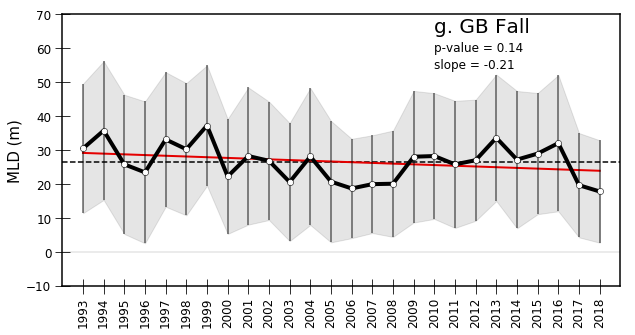

In [1020]:
plt.figure(figsize=(10,5))

plt.xlim(1992,2019)
toplot = w_grouped['dens_mld']
toplot_std = w_grouped_std['dens_mld']

plt.ylim(-10,70)
plt.plot(total_years, toplot, linestyle='-', color='k', linewidth=4,alpha = 1, zorder= 30)
plt.errorbar(total_years,toplot, toplot_std,linestyle='None', marker='o',color='k',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(toplot) - np.asarray(toplot_std), np.asarray(toplot) + np.asarray(toplot_std),color = 'k', alpha = 0.1,zorder = 30)
plt.scatter(total_years, toplot,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.axhline(y=np.nanmean(toplot), color='k', linestyle='--',alpha = 1)
plt.yticks([-10,0,10,20,30,40,50,60,70], fontsize = 12) 
plt.tick_params(axis="y", direction='inout',length=15)
plt.tick_params(axis="x", direction='inout',length=15)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.1)
plt.xticks([1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], fontsize =12,rotation=90) 
plt.text(2010, 64.5, 'g. GB Fall', dict(size=20))
plt.plot(x, -0.21*x +448.1636257413716, color='indigo',linewidth=3)
plt.ylabel('MLD (m)',fontsize=15)
# plt.axhline(y=np.nanmean(ratio_mean_sp_t), color='indigo', linestyle='--',alpha = 1)
plt.text(2010, 59, 'p-value = 0.14', dict(size=12))
plt.text(2010, 54, 'slope = -0.21', dict(size=12))
plt.plot(total_years, listnow, color='red',linewidth=2)

plt.savefig('LongtermTrend_GBfall')

In [391]:
print(list(v_grouped['dens_mld']))

[42.904761904761905, 37.774193548387096, 36.166666666666664, 30.130434782608695, 29.346938775510203, 34.479166666666664, 28.25423728813559, 44.31666666666667, 38.5, 33.78260869565217, 34.148148148148145, 40.87719298245614, 39.75675675675676, 26.227272727272727, 42.5, 31.930232558139537, 35.679245283018865, 31.485714285714284, 33.76086956521739, 34.35294117647059, 27.77777777777778, 51.774193548387096]


## FIGURE 13. Spatially averaged and climatological MLD difference of (a) GMLD minus observational density based MLDs and (b) GMLD03 minus observational density-based MLDs for the 5 eco-regions. full_list = pd.concat(full); full_list_reindex = full_list.reset_index()

In [734]:
t_interann_mean_densmld = []; t_interann_mean_tempmld = []; t_mean_densmld = []; t_mean_tempmld = []
y_interann_mean_densmld = []; y_interann_mean_tempmld = []; y_mean_densmld = []; y_mean_tempmld = []
w_interann_mean_densmld = []; w_interann_mean_tempmld = []; w_mean_densmld = []; w_mean_tempmld = []
x_interann_mean_densmld = []; x_interann_mean_tempmld = []; x_mean_densmld = []; x_mean_tempmld = []
v_interann_mean_densmld = []; v_interann_mean_tempmld = []; v_mean_densmld = []; v_mean_tempmld = []

for i in range(len(merged_full)): #full
    season = full[i] #full
    
    variablelist_003_t = []; yearlist_t = []; temp_mld_t = []; gmld_list_t = []
    variablelist_003_y = []; yearlist_y = []; temp_mld_y = []; gmld_list_y = []
    variablelist_003_x = []; yearlist_x = []; temp_mld_x = []; gmld_list_x = []
    variablelist_003_v = []; yearlist_v = []; temp_mld_v = []; gmld_list_v = []
    variablelist_003_w = []; yearlist_w = []; temp_mld_w = []; gmld_list_w = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
 
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            variablelist_003_t.append(season['003densmld'][ii])
            yearlist_t.append(season['year'][ii])
#             temp_mld_t.append(season['02tempmld'][ii])
            gmld_list_t.append(season['glorys_mld'][ii])
        elif polygon_y.contains(point) == True:
            variablelist_003_y.append(season['003densmld'][ii])
            yearlist_y.append(season['year'][ii])
#             temp_mld_y.append(season['02tempmld'][ii])
            gmld_list_y.append(season['glorys_mld'][ii])
        elif polygon_w.contains(point) == True:
            variablelist_003_w.append(season['003densmld'][ii])
            yearlist_w.append(season['year'][ii])
#             temp_mld_w.append(season['02tempmld'][ii])
            gmld_list_w.append(season['glorys_mld'][ii])
        elif polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
            variablelist_003_v.append(season['003densmld'][ii])
            yearlist_v.append(season['year'][ii])
#             temp_mld_v.append(season['02tempmld'][ii])
            gmld_list_v.append(season['glorys_mld'][ii])
        elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
            variablelist_003_x.append(season['003densmld'][ii])
            yearlist_x.append(season['year'][ii])
#             temp_mld_x.append(season['02tempmld'][ii])
            gmld_list_x.append(season['glorys_mld'][ii])
        else:
            pass
    
    pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': variablelist_003_t, '02tempmld': gmld_list_t})
    use = pandas_t    
    interannual_grouped_003_t = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_t

    t_interann_mean_densmld.append(np.mean(use_inter['variable']))
    t_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    t_mean_densmld.append(np.nanmean(use['variable']))
    t_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_y= pd.DataFrame({'year': yearlist_y, 'variable': variablelist_003_y, '02tempmld': gmld_list_y})
    use = pandas_y
    interannual_grouped_003_y = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_y
    
    y_interann_mean_densmld.append(np.mean(use_inter['variable']))
    y_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    y_mean_densmld.append(np.nanmean(use['variable']))
    y_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_w= pd.DataFrame({'year': yearlist_w, 'variable': variablelist_003_w, '02tempmld': gmld_list_w})
    use = pandas_w    
    interannual_grouped_003_w = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_w

    w_interann_mean_densmld.append(np.mean(use_inter['variable']))
    w_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    w_mean_densmld.append(np.nanmean(use['variable']))
    w_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_x= pd.DataFrame({'year': yearlist_x, 'variable': variablelist_003_x, '02tempmld': gmld_list_x})
    use = pandas_x
    interannual_grouped_003_x = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_x
    
    x_interann_mean_densmld.append(np.mean(use_inter['variable']))
    x_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    x_mean_densmld.append(np.nanmean(use['variable']))
    x_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_v= pd.DataFrame({'year': yearlist_v, 'variable': variablelist_003_v, '02tempmld': gmld_list_v})
    use = pandas_v
    interannual_grouped_003_v = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_v
    
    v_interann_mean_densmld.append(np.mean(use_inter['variable']))
    v_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    v_mean_densmld.append(np.nanmean(use['variable']))
    v_mean_tempmld.append(np.nanmean(use['02tempmld']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: Mean of empty slice


In [736]:
t_diff_interann = [a_i - b_i for a_i, b_i in zip(t_interann_mean_tempmld, t_interann_mean_densmld)]
y_diff_interann = [a_i - b_i for a_i, b_i in zip(y_interann_mean_tempmld, y_interann_mean_densmld)]
w_diff_interann = [a_i - b_i for a_i, b_i in zip(w_interann_mean_tempmld, w_interann_mean_densmld)]
x_diff_interann = [a_i - b_i for a_i, b_i in zip(x_interann_mean_tempmld, x_interann_mean_densmld)]
v_diff_interann = [a_i - b_i for a_i, b_i in zip(v_interann_mean_tempmld, v_interann_mean_densmld)]

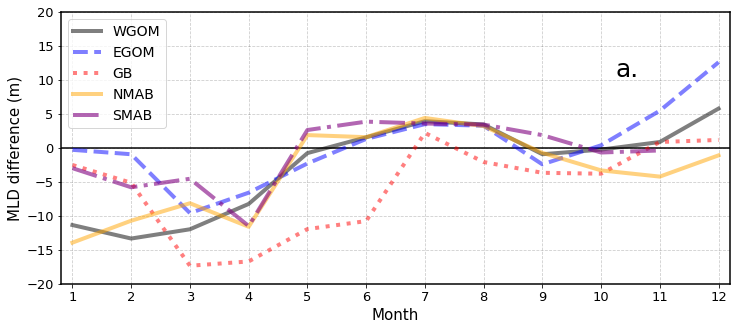

In [753]:
plt.figure(figsize=(12,5))
plt.axhline(y=0, color='k', linestyle='-',alpha = 1)
plt.plot(month, t_diff_interann, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.plot(month, y_diff_interann, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.plot(month, w_diff_interann, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.plot(month, x_diff_interann, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.plot(month, v_diff_interann, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.xlim(0.8,12.2); plt.ylim(-20,20)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD difference (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([-20,-15,-10,-5,0,5,10,15,20], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.legend(fontsize=14)
plt.text(10.25, 10.5, 'a.', dict(size=25))
# plt.text(2010, 10.5, 'a.', dict(size=20))
plt.savefig('Remake Figure 13 Interann')

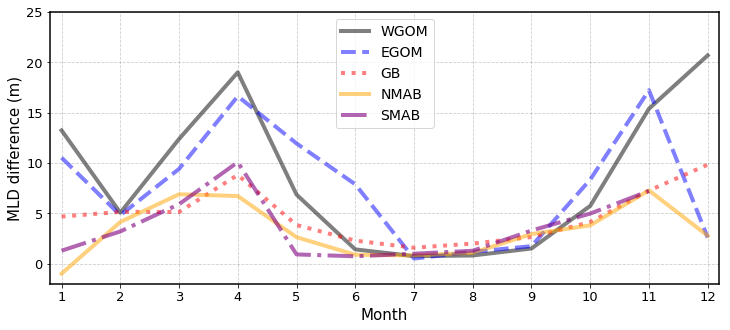

In [738]:
plt.figure(figsize=(12,5))

plt.plot(month, t_diff, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.plot(month, y_diff, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.plot(month, w_diff, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.plot(month, x_diff, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.plot(month, v_diff, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.xlim(0.8,12.2); plt.ylim(-2,25)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD difference (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.legend(fontsize=14,loc='upper center')
plt.savefig('Remake Figure 13 Not Interann')

In [1022]:
jan_new003 = pd.read_csv('01-with-gmld003.csv'); feb_new003 = pd.read_csv('02-with-gmld003.csv')
march_new003 = pd.read_csv('03-with-gmld003.csv'); april_new003 = pd.read_csv('04-with-gmld003.csv')
may_new003 = pd.read_csv('05-with-gmld003.csv'); june_new003 = pd.read_csv('06-with-gmld003.csv')
july_new003 = pd.read_csv('07-with-gmld003.csv'); aug_new003 = pd.read_csv('08-with-gmld003.csv')
sept_new003 = pd.read_csv('09-with-gmld003.csv'); octob_new003 = pd.read_csv('10-with-gmld003.csv')
nov_new003 = pd.read_csv('11-with-gmld003.csv'); dec_new003 = pd.read_csv('12-with-gmld003.csv')

In [1023]:
valtorep = 5

In [1024]:
jan_new003['003densmld'] = np.where(jan_new003['003densmld'] <= 5, valtorep, jan_new003['003densmld'])
feb_new003['003densmld'] = np.where(feb_new003['003densmld'] <= 5, valtorep, feb_new003['003densmld'])
march_new003['003densmld'] = np.where(march_new003['003densmld'] <= 5, valtorep, march_new003['003densmld'])
april_new003['003densmld'] = np.where(april_new003['003densmld'] <= 5, valtorep, april_new003['003densmld'])
may_new003['003densmld'] = np.where(may_new003['003densmld'] <= 5, valtorep, may_new003['003densmld'])
june_new003['003densmld'] = np.where(june_new003['003densmld'] <= 5, valtorep, june_new003['003densmld'])
july_new003['003densmld'] = np.where(july_new003['003densmld'] <= 5, valtorep, july_new003['003densmld'])
aug_new003['003densmld'] = np.where(aug_new003['003densmld'] <= 5, valtorep, aug_new003['003densmld'])
sept_new003['003densmld'] = np.where(sept_new003['003densmld'] <= 5, valtorep, sept_new003['003densmld'])
octob_new003['003densmld'] = np.where(octob_new003['003densmld'] <= 5, valtorep, octob_new003['003densmld'])
nov_new003['003densmld'] = np.where(nov_new003['003densmld'] <= 5, valtorep, nov_new003['003densmld'])
dec_new003['003densmld'] = np.where(dec_new003['003densmld'] <= 5, valtorep, dec_new003['003densmld'])

In [1025]:
winter_new003 = [dec_new003, jan_new003, feb_new003]; winter_list_new003 = pd.concat(winter_new003); winter_list_reindex_new003 = winter_list_new003.reset_index()
spring_new003 = [march_new003, april_new003, may_new003]; spring_list_new003 = pd.concat(spring_new003); spring_list_reindex_new003 = spring_list_new003.reset_index()
summer_new003 = [june_new003, july_new003, aug_new003]; summer_list_new003 = pd.concat(summer_new003); summer_list_reindex_new003 = summer_list_new003.reset_index()
fall_new003 = [sept_new003, octob_new003, nov_new003]; fall_list_new003 = pd.concat(fall_new003); fall_list_reindex_new003 = fall_list_new003.reset_index()


In [1026]:
full_new003 = [jan_new003.reset_index(), feb_new003.reset_index(), march_new003.reset_index(), april_new003.reset_index(), 
        may_new003.reset_index(), june_new003.reset_index(), july_new003.reset_index(), aug_new003.reset_index(), 
        sept_new003.reset_index(), octob_new003.reset_index(), nov_new003.reset_index(), dec_new003.reset_index()]

In [1027]:
full_list_new003 = pd.concat(full_new003)
# print(len(full_list_new003))
# full_list_reindex_new003 = full_list_new003.reset_index()

In [1028]:
print(len(full_list_new003))

36402


In [859]:
print(jan_new003)

      Unnamed: 0  obs_lat_x  obs_lon_x  glorys_lat_x  glorys_lon_x  \
0              0    40.9517    71.1700     40.916668    -71.166664   
1              1    40.6983    71.0500     40.666668    -71.083336   
2              2    40.6517    70.5500     40.666668    -70.583336   
3              3    40.8317    70.3833     40.833332    -70.416664   
4              4    40.9017    70.6833     40.916668    -70.666664   
...          ...        ...        ...           ...           ...   
1009        1138    39.3500    72.3650     39.333332    -72.333336   
1010        1139    39.6517    72.4117     39.666668    -72.416664   
1011        1140    39.5833    72.4450     39.583332    -72.416664   
1012        1141    39.6467    72.4750     39.666668    -72.500000   
1013        1142    39.6617    72.4450     39.666668    -72.416664   

      glorys_lat_index  glorys_lon_index  bottomdepth  year_x  date_no  \
0                   71                82           53    1993        6   
1          

In [1171]:
t_interann_mean_densmld = []; t_interann_mean_tempmld = []; t_mean_densmld = []; t_mean_tempmld = []
y_interann_mean_densmld = []; y_interann_mean_tempmld = []; y_mean_densmld = []; y_mean_tempmld = []
w_interann_mean_densmld = []; w_interann_mean_tempmld = []; w_mean_densmld = []; w_mean_tempmld = []
x_interann_mean_densmld = []; x_interann_mean_tempmld = []; x_mean_densmld = []; x_mean_tempmld = []
v_interann_mean_densmld = []; v_interann_mean_tempmld = []; v_mean_densmld = []; v_mean_tempmld = []

for i in range(12): #full
    season = full_new003[i] #full
    
    variablelist_003_t = []; yearlist_t = []; temp_mld_t = []; gmld_list_t = []
    variablelist_003_y = []; yearlist_y = []; temp_mld_y = []; gmld_list_y = []
    variablelist_003_x = []; yearlist_x = []; temp_mld_x = []; gmld_list_x = []
    variablelist_003_v = []; yearlist_v = []; temp_mld_v = []; gmld_list_v = []
    variablelist_003_w = []; yearlist_w = []; temp_mld_w = []; gmld_list_w = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon_x']),'lat': list(season['obs_lat_x'])})
 
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            variablelist_003_t.append(season['003densmld'][ii])
            yearlist_t.append(season['year_x'][ii])
#             temp_mld_t.append(season['02tempmld'][ii])
            gmld_list_t.append(season['glorysmld_new003'][ii])
        elif polygon_y.contains(point) == True:
            variablelist_003_y.append(season['003densmld'][ii])
            yearlist_y.append(season['year_x'][ii])
#             temp_mld_y.append(season['02tempmld'][ii])
            gmld_list_y.append(season['glorysmld_new003'][ii])
        elif polygon_w.contains(point) == True:
            variablelist_003_w.append(season['003densmld'][ii])
            yearlist_w.append(season['year_x'][ii])
#             temp_mld_w.append(season['02tempmld'][ii])
            gmld_list_w.append(season['glorysmld_new003'][ii])
        elif polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
            variablelist_003_v.append(season['003densmld'][ii])
            yearlist_v.append(season['year_x'][ii])
#             temp_mld_v.append(season['02tempmld'][ii])
            gmld_list_v.append(season['glorysmld_new003'][ii])
        elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
            variablelist_003_x.append(season['003densmld'][ii])
            yearlist_x.append(season['year_x'][ii])
#             temp_mld_x.append(season['02tempmld'][ii])
            gmld_list_x.append(season['glorysmld_new003'][ii])
        else:
            pass
    
    pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': variablelist_003_t, '02tempmld': gmld_list_t})
    use = pandas_t    
    interannual_grouped_003_t = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_t

    t_interann_mean_densmld.append(np.mean(use_inter['variable']))
    t_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    t_mean_densmld.append(np.nanmean(use['variable']))
    t_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_y= pd.DataFrame({'year': yearlist_y, 'variable': variablelist_003_y, '02tempmld': gmld_list_y})
    use = pandas_y
    interannual_grouped_003_y = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_y
    
    y_interann_mean_densmld.append(np.mean(use_inter['variable']))
    y_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    y_mean_densmld.append(np.nanmean(use['variable']))
    y_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_w= pd.DataFrame({'year': yearlist_w, 'variable': variablelist_003_w, '02tempmld': gmld_list_w})
    use = pandas_w    
    interannual_grouped_003_w = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_w

    w_interann_mean_densmld.append(np.mean(use_inter['variable']))
    w_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    w_mean_densmld.append(np.nanmean(use['variable']))
    w_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_x= pd.DataFrame({'year': yearlist_x, 'variable': variablelist_003_x, '02tempmld': gmld_list_x})
    use = pandas_x
    interannual_grouped_003_x = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_x
    
    x_interann_mean_densmld.append(np.mean(use_inter['variable']))
    x_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    x_mean_densmld.append(np.nanmean(use['variable']))
    x_mean_tempmld.append(np.nanmean(use['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_v= pd.DataFrame({'year': yearlist_v, 'variable': variablelist_003_v, '02tempmld': gmld_list_v})
    use = pandas_v
    interannual_grouped_003_v = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_v
    
    v_interann_mean_densmld.append(np.mean(use_inter['variable']))
    v_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
    
    v_mean_densmld.append(np.nanmean(use['variable']))
    v_mean_tempmld.append(np.nanmean(use['02tempmld']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: Mean of empty slice


In [1172]:
t_diff_interann = [a_i - b_i  for a_i, b_i in zip(t_interann_mean_tempmld, t_interann_mean_densmld)]
y_diff_interann = [a_i - b_i for a_i, b_i in zip(y_interann_mean_tempmld, y_interann_mean_densmld)]
w_diff_interann = [a_i - b_i for a_i, b_i in zip(w_interann_mean_tempmld, w_interann_mean_densmld)]
x_diff_interann = [a_i - b_i for a_i, b_i in zip(x_interann_mean_tempmld, x_interann_mean_densmld)]
v_diff_interann = [a_i - b_i for a_i, b_i in zip(v_interann_mean_tempmld, v_interann_mean_densmld)]

In [864]:
t_diff_interann = [b_i - a_i  for a_i, b_i in zip(t_interann_mean_tempmld, t_interann_mean_densmld)]
y_diff_interann = [b_i - a_i for a_i, b_i in zip(y_interann_mean_tempmld, y_interann_mean_densmld)]
w_diff_interann = [b_i - a_i for a_i, b_i in zip(w_interann_mean_tempmld, w_interann_mean_densmld)]
x_diff_interann = [b_i - a_i for a_i, b_i in zip(x_interann_mean_tempmld, x_interann_mean_densmld)]
v_diff_interann = [b_i - a_i for a_i, b_i in zip(v_interann_mean_tempmld, v_interann_mean_densmld)]

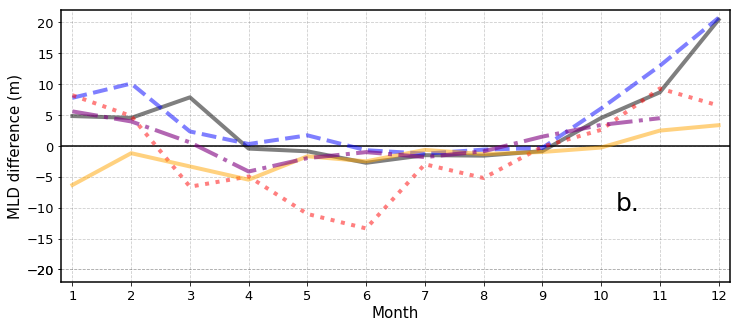

In [1175]:
plt.figure(figsize=(12,5))
plt.axhline(y=0, color='k', linestyle='-',alpha = 1)
plt.plot(month, t_diff_interann, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.plot(month, y_diff_interann, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.plot(month, w_diff_interann, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.plot(month, x_diff_interann, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.plot(month, v_diff_interann, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.xlim(0.8,12.2); plt.ylim(-20,20)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD difference (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([-20,-20,-15,-10,-5,0,5,10,15,20], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
# plt.legend(fontsize=14)
plt.ylim(-22,22)
plt.text(10.25, -10.5, 'b.', dict(size=25))
# plt.text(2010, 10.5, 'a.', dict(size=20))
plt.savefig('Remake Figure 13b Interann',dpi=400)

In [1052]:
# TABLE 2 and TABLE 4 and TABLE 3:

season = fall_list_reindex_new003 #winter_list_reindex_new003 spring_list_reindex_new003 summer_list_reindex_new003 fall_list_reindex_new003

newdf = pd.DataFrame({'lon': list(season['obs_lon_x']),'lat': list(season['obs_lat_x'])})
# newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})

gmld = []; gmld03 = []
t_dens = []; t_year = []; gmld_list_t = []; gmld_t = []
y_dens = []; y_year = []; gmld_list_y = []; gmld_y = []
w_dens = []; w_year = []; gmld_list_w = []; gmld_w = []
x_dens = []; x_year = []; gmld_list_x = []; gmld_x = []
v_dens = []; v_year = []; gmld_list_v = []; gmld_v = []

for ii in range(len(season)):
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_t.contains(point) == True:
        t_dens.append(season['003densmld'][ii])
        t_year.append(season['year_x'][ii]) 
#         t_year.append(season['year'][ii])
        gmld_list_t.append(season['glorysmld_new003'][ii]) #glorys_mld
        gmld_t.append(season['glorys_mld'][ii])
        gmld.append(season['glorys_mld'][ii])
        gmld03.append(season['glorysmld_new003'][ii])
    elif polygon_y.contains(point) == True:
        y_dens.append(season['003densmld'][ii])
        y_year.append(season['year_x'][ii])
#         y_year.append(season['year'][ii])
        gmld_list_y.append(season['glorysmld_new003'][ii])
        gmld_y.append(season['glorys_mld'][ii])
        gmld.append(season['glorys_mld'][ii])
        gmld03.append(season['glorysmld_new003'][ii])
    elif polygon_w.contains(point) == True:
        w_dens.append(season['003densmld'][ii])
        w_year.append(season['year_x'][ii])
#         w_year.append(season['year'][ii])
        gmld_list_w.append(season['glorysmld_new003'][ii])
        gmld_w.append(season['glorys_mld'][ii])
        gmld.append(season['glorys_mld'][ii])
        gmld03.append(season['glorysmld_new003'][ii])
    elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
        x_dens.append(season['003densmld'][ii])
        x_year.append(season['year_x'][ii])
#         x_year.append(season['year'][ii])
        gmld_list_x.append(season['glorysmld_new003'][ii])
        gmld_x.append(season['glorys_mld'][ii])
        gmld.append(season['glorys_mld'][ii])
        gmld03.append(season['glorysmld_new003'][ii])
    elif polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
        v_dens.append(season['003densmld'][ii])
        v_year.append(season['year_x'][ii])
#         v_year.append(season['year'][ii])
        gmld_list_v.append(season['glorysmld_new003'][ii])
        gmld_v.append(season['glorys_mld'][ii])
        gmld.append(season['glorys_mld'][ii])
        gmld03.append(season['glorysmld_new003'][ii])

pandas_t_table1= pd.DataFrame({'dens_mld': t_dens, 'year': t_year, '03gmldnew': gmld_list_t, 'gmld':gmld_t })
# pandas_t_table1= pd.DataFrame({'dens_mld': t_dens, 'year': t_year, 'gmld':gmld_t })
t_grouped = pandas_t_table1.groupby(['year']).mean()
t_grouped_std = pandas_t_table1.groupby(['year']).std()

pandas_y_table1= pd.DataFrame({'dens_mld': y_dens, 'year': y_year, '03gmldnew': gmld_list_y, 'gmld':gmld_y})
# pandas_y_table1= pd.DataFrame({'dens_mld': y_dens, 'year': y_year, 'gmld':gmld_y})
y_grouped = pandas_y_table1.groupby(['year']).mean()
y_grouped_std = pandas_y_table1.groupby(['year']).std()

pandas_w_table1= pd.DataFrame({'dens_mld': w_dens, 'year': w_year, '03gmldnew': gmld_list_w, 'gmld':gmld_w})
# pandas_w_table1= pd.DataFrame({'dens_mld': w_dens, 'year': w_year, 'gmld':gmld_w})
w_grouped = pandas_w_table1.groupby(['year']).mean()
w_grouped_std = pandas_w_table1.groupby(['year']).std()

pandas_x_table1= pd.DataFrame({'dens_mld': x_dens, 'year': x_year, '03gmldnew': gmld_list_x, 'gmld':gmld_x})
# pandas_x_table1= pd.DataFrame({'dens_mld': x_dens, 'year': x_year, 'gmld':gmld_x})
x_grouped = pandas_x_table1.groupby(['year']).mean()
x_grouped_std = pandas_x_table1.groupby(['year']).std()

pandas_v_table1= pd.DataFrame({'dens_mld': v_dens, 'year': v_year, '03gmldnew': gmld_list_v, 'gmld':gmld_v})
# pandas_v_table1= pd.DataFrame({'dens_mld': v_dens, 'year': v_year, 'gmld':gmld_v})
v_grouped = pandas_v_table1.groupby(['year']).mean()
v_grouped_std = pandas_v_table1.groupby(['year']).std()

In [1055]:
print(len(gmld))
print(len(gmld03))
lessthan = []
for i in range(len(gmld)):
    if gmld03[i] < 5.5:
        lessthan.append(1)
print(len(lessthan))

10522
10522
1503


In [1056]:
1503/10522

0.14284356586200342

In [1427]:
yearlist = list(pandas_t_table1.year.unique())
yearlistint = [int(i) for i in yearlist]
print(len(yearlistint))

20


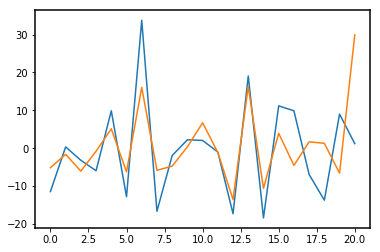

21
21
[[170.18098429  78.42892568]
 [ 78.42892568 101.00612873]]
Pearsons correlation: 0.598
pval: 0.004176999123745448


In [1432]:
# TABLE 3
using = v_grouped
# plt.plot(using['dens_mld'])
# plt.plot(using['gmld'])
# plt.plot(using['03gmldnew'])
# plt.show()

g_mld = using['gmld']
g_mld_new = using['03gmldnew']
obsmld03 = using['dens_mld']

using_reindex = using.reset_index()

diff_x = list(); diff_y = list()
for i in range(1,len(using_reindex)):
    value_x = (using_reindex['03gmldnew'][i] - using_reindex['03gmldnew'][i-1])
    diff_x.append(value_x)
    
    value_y = (using_reindex['dens_mld'][i] - using_reindex['dens_mld'][i-1])
    diff_y.append(value_y)

plt.plot(diff_x)
plt.plot(diff_y)
plt.show()
print(len(diff_x))
print(len(diff_y))

from numpy import cov; from scipy.stats import pearsonr
x = diff_x
y = diff_y
covariance = cov(x, y)
print(covariance)
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('pval:', p_value)

22


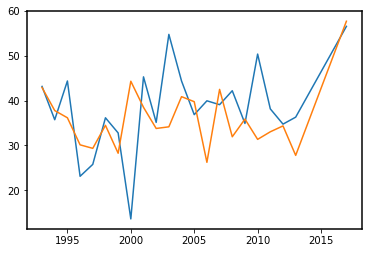

In [1273]:
merged = pd.merge(x_grouped, v_grouped, left_on=['year'], 
                        right_on = ['year'], left_index=True, how='outer', sort=False)
mergedna = merged.dropna() 
print(len(mergedna))
plt.plot(mergedna.index,mergedna['dens_mld_x'])
plt.plot(mergedna.index,mergedna['dens_mld_y'])
plt.show()

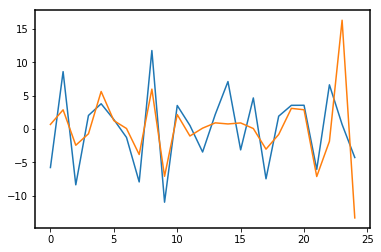

25
25
26
[[33.88801476 16.34375258]
 [16.34375258 28.32830958]]
Pearsons correlation: 0.527
pval: 0.006732511530682516


In [1262]:
# detrending and finding the correlation and p-value
mergedna_reindex = mergedna.reset_index()

diff_x = list(); diff_y = list()
for i in range(1,len(mergedna_reindex)):
    value_x = (mergedna_reindex['dens_mld_x'][i] - mergedna_reindex['dens_mld_x'][i-1])
    diff_x.append(value_x)
    
    value_y = (mergedna_reindex['dens_mld_y'][i] - mergedna_reindex['dens_mld_y'][i-1])
    diff_y.append(value_y)

plt.plot(diff_x)
plt.plot(diff_y)
plt.show()
print(len(diff_x))
print(len(diff_y))

from numpy import cov; from scipy.stats import pearsonr
print(len(mergedna))
x = diff_x
y = diff_y
covariance = cov(x, y)
print(covariance)
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('pval:', p_value)

26
26


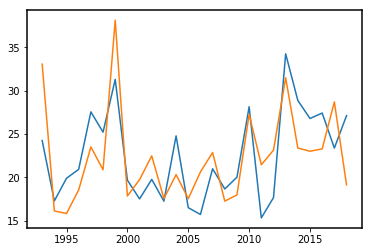

In [1102]:
plt.plot(t_grouped.index,t_grouped['dens_mld'])
print(len(t_grouped))
plt.plot(y_grouped.index,y_grouped['dens_mld'])
print(len(y_grouped))
plt.show()

In [1103]:
# print(np.mean(y_grouped))
# print(len(y_grouped))
# print('')
# print(np.std(y_grouped))
# print('')
# print(scipy.stats.sem(y_grouped, nan_policy='omit'))

In [1171]:
from numpy import cov; from scipy.stats import pearsonr
print(len(mergedna))
x = diff_x
y = diff_y
covariance = cov(x, y)
print(covariance)
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('pval:', p_value)

22
[[172.55294533  -6.16803405]
 [ -6.16803405  85.19276866]]
Pearsons correlation: -0.051
pval: 0.8266548863152934


In [972]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy import stats

print('')
pandas_t_table1= pd.DataFrame({'region1': mergedna['dens_mld_x'], 'region2': mergedna['dens_mld_y']})
# pandas_t_table1_clean = pandas_t_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_t_table1.corr()
print('WGOM')
print(pandas_t_table1.corr())
print(stats.pearsonr(pandas_t_table1['region1'], pandas_t_table1['region2']))

pandas_t_table1_clean_reindex = pandas_t_table1_clean.reset_index()
X = pandas_t_table1_clean_reindex['region1']
Y = pandas_t_table1_clean_reindex['region2']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')


WGOM
          region1   region2
region1  1.000000  0.149922
region2  0.149922  1.000000
(0.14992248083436555, 0.5526624502442985)


KeyError: 'region1'

In [967]:
# total_years = list(t_grouped.index)
# value = list(t_grouped['dens_mld'])
# print(len(t_grouped))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(total_years, value)
# print('slope:  ',slope)
# # print('r_value:',r_value)
# print('p_value:',p_value)
# print(r_value)
# # print('std_err:',std_err)
# print('')
# print('intercept:',intercept)

# listnow = []
# for i in range(len(total_years)): 
#     a = (slope*total_years[i] + intercept)
#     listnow.append(a)

In [ ]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy import stats

print('')
pandas_t_table1= pd.DataFrame({'dens_mld': t_dens, 'temp_mld': t_temp})
pandas_t_table1_clean = pandas_t_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_t_table1.corr()
print('WGOM')
print(pandas_t_table1.corr())
print(stats.pearsonr(pandas_t_table1_clean['dens_mld'], pandas_t_table1_clean['temp_mld']))

pandas_t_table1_clean_reindex = pandas_t_table1_clean.reset_index()
X = pandas_t_table1_clean_reindex['dens_mld']
Y = pandas_t_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_y_table1= pd.DataFrame({'dens_mld': y_dens, 'temp_mld': y_temp})
pandas_y_table1_clean = pandas_y_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_y_table1.corr()
print('EGOM')
print(pandas_y_table1.corr())
print(stats.pearsonr(pandas_y_table1_clean['dens_mld'], pandas_y_table1_clean['temp_mld']))

pandas_y_table1_clean_reindex = pandas_y_table1_clean.reset_index()
X = pandas_y_table1_clean_reindex['dens_mld']
Y = pandas_y_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_w_table1= pd.DataFrame({'dens_mld': w_dens, 'temp_mld': w_temp})
pandas_w_table1_clean = pandas_w_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_w_table1.corr()
print('GB')
print(pandas_w_table1.corr())
print(stats.pearsonr(pandas_w_table1_clean['dens_mld'], pandas_w_table1_clean['temp_mld']))

pandas_w_table1_clean_reindex = pandas_w_table1_clean.reset_index()
X = pandas_w_table1_clean_reindex['dens_mld']
Y = pandas_w_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_v_table1= pd.DataFrame({'dens_mld': v_dens, 'temp_mld': v_temp})
pandas_v_table1_clean = pandas_v_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_v_table1.corr()
print('SMAB')
print(pandas_v_table1.corr())
print(stats.pearsonr(pandas_v_table1_clean['dens_mld'], pandas_v_table1_clean['temp_mld']))

pandas_v_table1_clean_reindex = pandas_v_table1_clean.reset_index()
X = pandas_v_table1_clean_reindex['dens_mld']
Y = pandas_v_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)
print('')

pandas_x_table1= pd.DataFrame({'dens_mld': x_dens, 'temp_mld': x_temp})
pandas_x_table1_clean = pandas_x_table1.dropna(subset=['dens_mld', 'temp_mld'])
pandas_x_table1.corr()
print('NMAB')
print(pandas_x_table1.corr())
print(stats.pearsonr(pandas_x_table1_clean['dens_mld'], pandas_x_table1_clean['temp_mld']))
pandas_x_table1_clean_reindex = pandas_x_table1_clean.reset_index()
X = pandas_x_table1_clean_reindex['dens_mld']
Y = pandas_x_table1_clean_reindex['temp_mld']
print((((X.values.flatten()-Y.values.flatten())**2).mean())**0.5)